In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('bmi_data.csv')

In [4]:
data.head()

seqn  total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
0  21017.0       107.66      70.08         2176.0       2098.06   19.714286   
1  21033.0        84.92      53.74         1042.0       1040.79   22.000000   
2  21059.0        45.65      22.97          839.0       1401.61    5.900000   
3  21067.0       163.69     137.59         4190.0       7489.00   51.615385   
4  21091.0        54.95      28.36         1425.0       1713.75    4.588235   

        alcohol  RIAGENDR  RIDRETH1  INDFMPIR  RIDAGEYR  BMXWT  BMXBMI  \
0  7.556647e-78       2.0       1.0      0.21      37.0   45.1   19.34   
1  5.937366e-78       2.0       4.0      0.33      57.0   90.3   32.07   
2  1.410000e+01       2.0       3.0      5.00      51.0   52.3   20.61   
3  1.674000e+02       1.0       3.0      2.40      25.0  108.3   31.17   
4  1.530000e+01       2.0       3.0      1.61      25.0   57.4   22.09   

   BMXWAIST  PAD080     year  
0      77.8    15.0  2003-04  
1     103.0    45.0  2003-04  
2      70.0    15.0  2003-04  
3     107.4    30.0  2003-04  
4      77.0    10.0  2003-04

In [5]:
data.shape

(1500, 16)

In [6]:
data.columns

Index(['seqn', 'total_sugar', 'total_fat', 'energy_intake', 'total_weight',
       'cholestrol', 'alcohol', 'RIAGENDR', 'RIDRETH1', 'INDFMPIR', 'RIDAGEYR',
       'BMXWT', 'BMXBMI', 'BMXWAIST', 'PAD080', 'year'],
      dtype='object')

In [7]:
data.dtypes

seqn             float64
total_sugar      float64
total_fat        float64
energy_intake    float64
total_weight     float64
cholestrol       float64
alcohol          float64
RIAGENDR         float64
RIDRETH1         float64
INDFMPIR         float64
RIDAGEYR         float64
BMXWT            float64
BMXBMI           float64
BMXWAIST         float64
PAD080           float64
year              object
dtype: object

In [8]:
data.isna().sum()

seqn             0
total_sugar      0
total_fat        0
energy_intake    0
total_weight     0
cholestrol       0
alcohol          0
RIAGENDR         0
RIDRETH1         0
INDFMPIR         0
RIDAGEYR         0
BMXWT            0
BMXBMI           0
BMXWAIST         0
PAD080           0
year             0
dtype: int64

In [9]:
data.rename(columns={
    'RIAGENDR': 'Gender',
    'RIDRETH1': 'Race',
    'INDFMPIR': 'Poverty to income ratio',
    'RIDAGEYR': 'Age',
    'BMXWT': 'Body weight',
    'BMXBMI': 'BMI',
    'BMXWAIST': 'Waist circumference',
    'PAD080': 'Physical activity(min)'
}, inplace=True)

In [10]:
data

seqn  total_sugar  total_fat  energy_intake  total_weight  \
0     21017.0       107.66      70.08         2176.0       2098.06   
1     21033.0        84.92      53.74         1042.0       1040.79   
2     21059.0        45.65      22.97          839.0       1401.61   
3     21067.0       163.69     137.59         4190.0       7489.00   
4     21091.0        54.95      28.36         1425.0       1713.75   
...       ...          ...        ...            ...           ...   
1495  41422.0        83.03     149.10         2913.0       3341.17   
1496  41439.0        22.32      17.84          782.0       4429.32   
1497  41444.0       391.39     174.30         4430.0       5132.86   
1498  41450.0       301.05     137.81         3994.0       3109.52   
1499  41462.0       176.14     177.15         4791.0       6262.06   

      cholestrol       alcohol  Gender  Race  Poverty to income ratio   Age  \
0      19.714286  7.556647e-78     2.0   1.0                     0.21  37.0   
1      22.000000  5.937366e-78     2.0   4.0                     0.33  57.0   
2       5.900000  1.410000e+01     2.0   3.0                     5.00  51.0   
3      51.615385  1.674000e+02     1.0   3.0                     2.40  25.0   
4       4.588235  1.530000e+01     2.0   3.0                     1.61  25.0   
...          ...           ...     ...   ...                      ...   ...   
1495   30.578947  1.025545e-77     2.0   3.0                     1.89  20.0   
1496   13.625000  4.318084e-78     1.0   3.0                     4.76  21.0   
1497   18.739130  1.241449e-77     1.0   2.0                     0.31  20.0   
1498   12.652174  1.241449e-77     1.0   3.0                     5.00  57.0   
1499   17.076923  7.270000e+01     1.0   3.0                     4.83  56.0   

      Body weight    BMI  Waist circumference  Physical activity(min)     year  
0            45.1  19.34                 77.8                    15.0  2003-04  
1            90.3  32.07                103.0                    45.0  2003-04  
2            52.3  20.61                 70.0                    15.0  2003-04  
3           108.3  31.17                107.4                    30.0  2003-04  
4            57.4  22.09                 77.0                    10.0  2003-04  
...           ...    ...                  ...                     ...      ...  
1495         54.9  21.45                 73.2                    15.0  2005-06  
1496         91.7  27.35                100.5                    30.0  2005-06  
1497        105.1  31.04                 97.6                    15.0  2005-06  
1498        118.9  32.90                114.7                    30.0  2005-06  
1499         75.2  23.71                 88.5                    20.0  2005-06  

[1500 rows x 16 columns]

In [11]:
data.drop(columns=['seqn','year'], axis=1, inplace=True)

In [12]:
data.head()

total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
0       107.66      70.08         2176.0       2098.06   19.714286   
1        84.92      53.74         1042.0       1040.79   22.000000   
2        45.65      22.97          839.0       1401.61    5.900000   
3       163.69     137.59         4190.0       7489.00   51.615385   
4        54.95      28.36         1425.0       1713.75    4.588235   

        alcohol  Gender  Race  Poverty to income ratio   Age  Body weight  \
0  7.556647e-78     2.0   1.0                     0.21  37.0         45.1   
1  5.937366e-78     2.0   4.0                     0.33  57.0         90.3   
2  1.410000e+01     2.0   3.0                     5.00  51.0         52.3   
3  1.674000e+02     1.0   3.0                     2.40  25.0        108.3   
4  1.530000e+01     2.0   3.0                     1.61  25.0         57.4   

     BMI  Waist circumference  Physical activity(min)  
0  19.34                 77.8                    15.0  
1  32.07                103.0                    45.0  
2  20.61                 70.0                    15.0  
3  31.17                107.4                    30.0  
4  22.09                 77.0                    10.0

In [168]:
l = ['Gender','Race']
for i in l:
    print(data[i].value_counts())

Gender
1.0    861
2.0    639
Name: count, dtype: int64
Race
3.0    698
4.0    386
1.0    276
5.0     77
2.0     63
Name: count, dtype: int64


In [169]:
data.describe()

total_sugar     total_fat  energy_intake  total_weight    cholestrol  \
count  1500.000000  1.500000e+03    1500.000000   1500.000000  1.500000e+03   
mean    134.427600  8.836197e+01    2401.772000   3228.164647  2.102557e+01   
std      91.942697  5.095667e+01    1127.548785   1632.629756  1.779470e+01   
min       1.720000  5.397605e-79     225.000000    283.840000  5.397605e-79   
25%      71.620000  5.149500e+01    1611.750000   2080.522500  9.699507e+00   
50%     114.815000  7.855000e+01    2234.500000   2909.780000  1.581534e+01   
75%     174.480000  1.153725e+02    2978.250000   4047.112500  2.708523e+01   
max     908.920000  4.225900e+02    8550.000000  11481.670000  1.814286e+02   

            alcohol       Gender       Race  Poverty to income ratio  \
count  1.500000e+03  1500.000000  1500.0000             1.500000e+03   
mean   1.596447e+01     1.426000     2.9500             2.644553e+00   
std    3.639291e+01     0.494659     1.1131             1.695127e+00   
min    5.397605e-79     1.000000     1.0000             5.397605e-79   
25%    7.016887e-78     1.000000     3.0000             1.137500e+00   
50%    1.025545e-77     1.000000     3.0000             2.275000e+00   
75%    1.542500e+01     2.000000     4.0000             4.542500e+00   
max    3.226000e+02     2.000000     5.0000             5.000000e+00   

               Age  Body weight          BMI  Waist circumference  \
count  1500.000000  1500.000000  1500.000000          1500.000000   
mean     38.502667    81.410667    27.844213            95.414467   
std      12.377242    20.626077     6.415801            15.964616   
min      20.000000    36.700000    14.650000            63.700000   
25%      28.000000    67.375000    23.327500            83.900000   
50%      38.000000    78.600000    26.625000            93.900000   
75%      48.000000    91.625000    31.005000           104.625000   
max      65.000000   218.600000    63.870000           175.000000   

       Physical activity(min)  
count             1500.000000  
mean                44.012667  
std                 51.465169  
min                  1.000000  
25%                 15.000000  
50%                 30.000000  
75%                 60.000000  
max                600.000000

In [170]:
data.corr()

total_sugar  total_fat  energy_intake  total_weight  \
total_sugar                 1.000000   0.434109       0.658521      0.380084   
total_fat                   0.434109   1.000000       0.865242      0.439402   
energy_intake               0.658521   0.865242       1.000000      0.582836   
total_weight                0.380084   0.439402       0.582836      1.000000   
cholestrol                  0.091408   0.358671       0.309903      0.100566   
alcohol                    -0.026497   0.113708       0.340603      0.316407   
Gender                     -0.236070  -0.279268      -0.375525     -0.257717   
Race                        0.006188   0.057029       0.018226     -0.016314   
Poverty to income ratio    -0.096248   0.005091      -0.012571      0.091036   
Age                        -0.103390  -0.075941      -0.102762      0.005066   
Body weight                 0.071344   0.147358       0.122762      0.130864   
BMI                        -0.032694   0.005612      -0.044316      0.013333   
Waist circumference        -0.006895   0.050777       0.016005      0.060123   
Physical activity(min)      0.030625   0.079175       0.067311      0.035283   

                         cholestrol   alcohol    Gender      Race  \
total_sugar                0.091408 -0.026497 -0.236070  0.006188   
total_fat                  0.358671  0.113708 -0.279268  0.057029   
energy_intake              0.309903  0.340603 -0.375525  0.018226   
total_weight               0.100566  0.316407 -0.257717 -0.016314   
cholestrol                 1.000000  0.081180 -0.199614  0.056806   
alcohol                    0.081180  1.000000 -0.165806  0.029484   
Gender                    -0.199614 -0.165806  1.000000  0.010844   
Race                       0.056806  0.029484  0.010844  1.000000   
Poverty to income ratio   -0.108611  0.041303 -0.074396  0.109865   
Age                       -0.077478 -0.011882 -0.067251  0.016497   
Body weight                0.120699 -0.008222 -0.270916  0.100077   
BMI                        0.054937 -0.080960  0.044124  0.019133   
Waist circumference        0.074519 -0.036751 -0.143774 -0.012671   
Physical activity(min)     0.051820  0.017142 -0.071568  0.058831   

                         Poverty to income ratio       Age  Body weight  \
total_sugar                            -0.096248 -0.103390     0.071344   
total_fat                               0.005091 -0.075941     0.147358   
energy_intake                          -0.012571 -0.102762     0.122762   
total_weight                            0.091036  0.005066     0.130864   
cholestrol                             -0.108611 -0.077478     0.120699   
alcohol                                 0.041303 -0.011882    -0.008222   
Gender                                 -0.074396 -0.067251    -0.270916   
Race                                    0.109865  0.016497     0.100077   
Poverty to income ratio                 1.000000  0.204052     0.059472   
Age                                     0.204052  1.000000     0.109657   
Body weight                             0.059472  0.109657     1.000000   
BMI                                    -0.024743  0.139367     0.878064   
Waist circumference                     0.011122  0.256451     0.905420   
Physical activity(min)                 -0.059609  0.027257     0.028560   

                              BMI  Waist circumference  Physical activity(min)  
total_sugar             -0.032694            -0.006895                0.030625  
total_fat                0.005612             0.050777                0.079175  
energy_intake           -0.044316             0.016005                0.067311  
total_weight             0.013333             0.060123                0.035283  
cholestrol               0.054937             0.074519                0.051820  
alcohol                 -0.080960            -0.036751                0.017142  
Gender                   0.044124            -0.143774               -0.071568  
Race          

<AxesSubplot:>

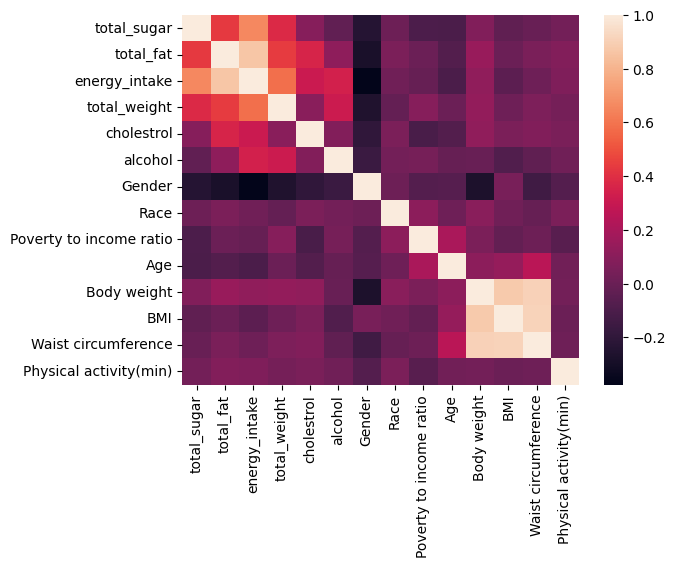

In [171]:
sns.heatmap(data.corr())

1. Individuals with larger waist circumferences tend to have higher BMI values. This strong association highlights the importance of waist measurements as an indicator of overall body fat and potential obesity risk. Managing waist circumference through diet and exercise can be crucial in maintaining a healthy BMI.</br>

2.  As individuals age increase, their BMI generally tends to increase. This moderate correlation suggests that age-related factors, such as changes in metabolism, hormonal shifts, and decreased physical activity, can contribute to weight gain and higher BMI over time.</br>

3. Despite its importance for overall health, physical activity alone shows a very weak correlation with BMI in this dataset. This indicates that while exercise is beneficial, it may not be a strong standalone predictor of BMI. Other factors, such as diet and genetics, might play a more significant role in determining BMI.</br>

4. There is a minimal inverse relationship between alcohol consumption and BMI. This weak negative correlation suggests that higher alcohol intake does not significantly predict lower BMI. However, alcohol consumption's impact on weight might be complex and influenced by additional lifestyle and dietary factors.</br>

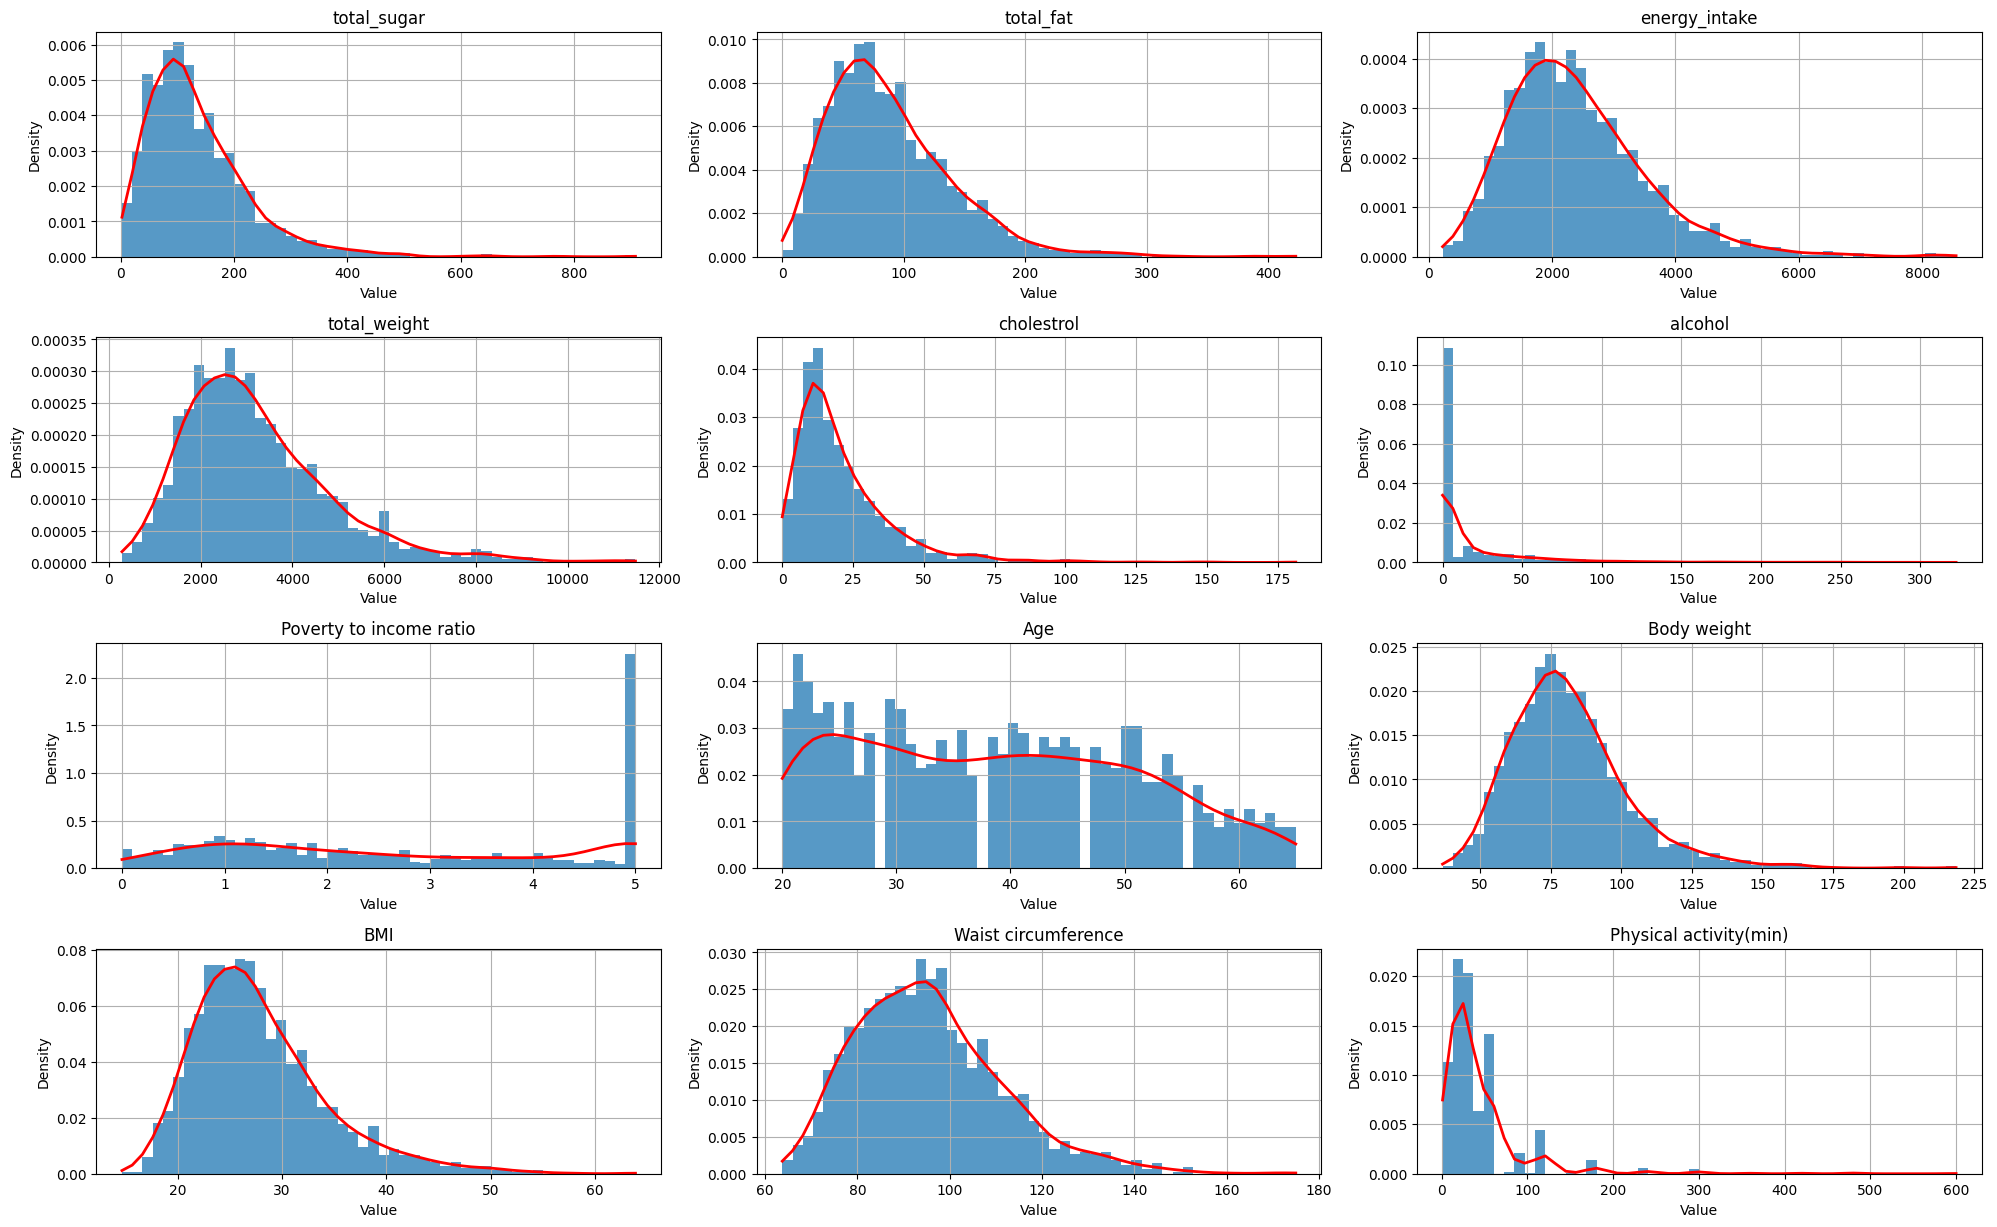

In [172]:
from scipy.stats import gaussian_kde

columns = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight',
                   'cholestrol', 'alcohol', 'Poverty to income ratio', 'Age',
                   'Body weight', 'BMI', 'Waist circumference', 'Physical activity(min)']

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(5, 3, i + 1)  # Adjust subplot layout as needed
    values = np.array(data[column])
    
    # Plot histogram
    counts, bins, _ = plt.hist(values, bins=50, density=True, alpha=0.75)
    
    # Overlay KDE curve
    kde = gaussian_kde(values)
    kde_vals = kde(bins)
    plt.plot(bins, kde_vals, 'r-', linewidth=2)
    
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid(True)

plt.tight_layout()
plt.show()


1.  Right skewness in total_sugar, total_fat, and energy_intake suggests that while most individuals consume moderate amounts, a small number have very high intakes. This aligns with the fact that excessive consumption of these can lead to obesity.</br>
2. Right skewness in Physical activity (min) indicates that while most people engage in some physical activity, a few engage in a very high amount. Lower levels of physical activity are associated with higher obesity rates.</br>

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\_ol

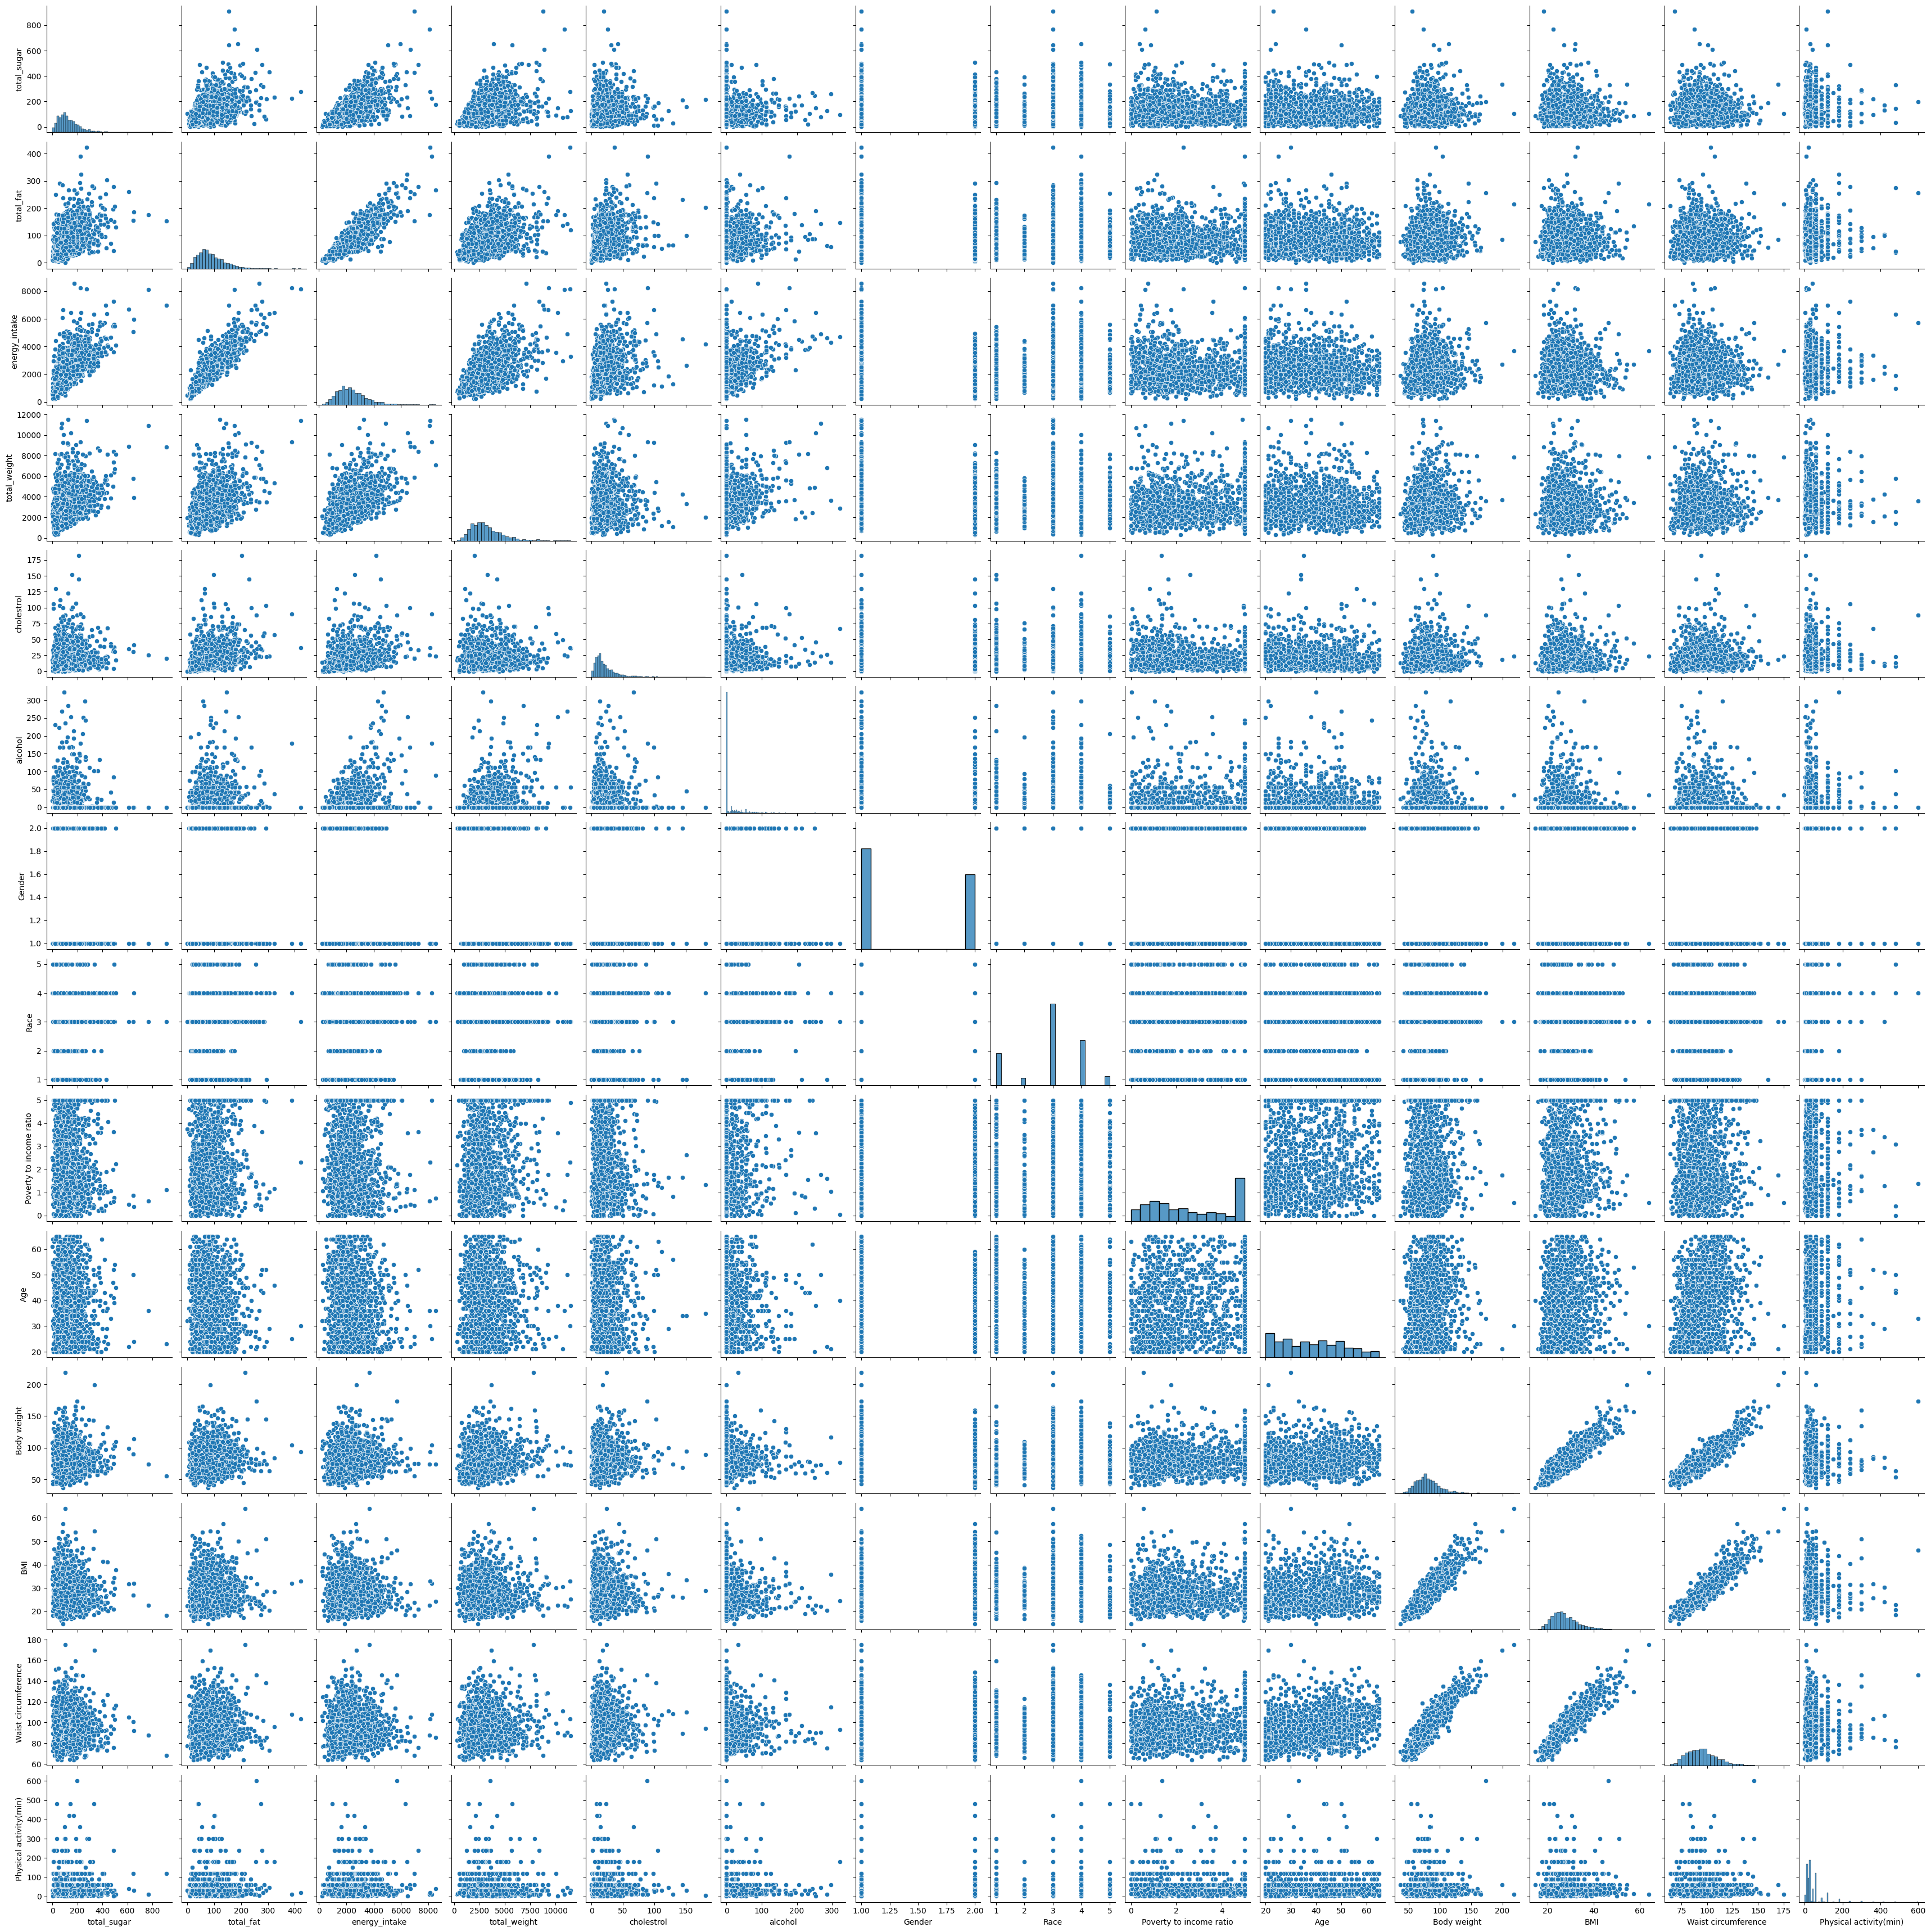

In [173]:
sns.pairplot(data)

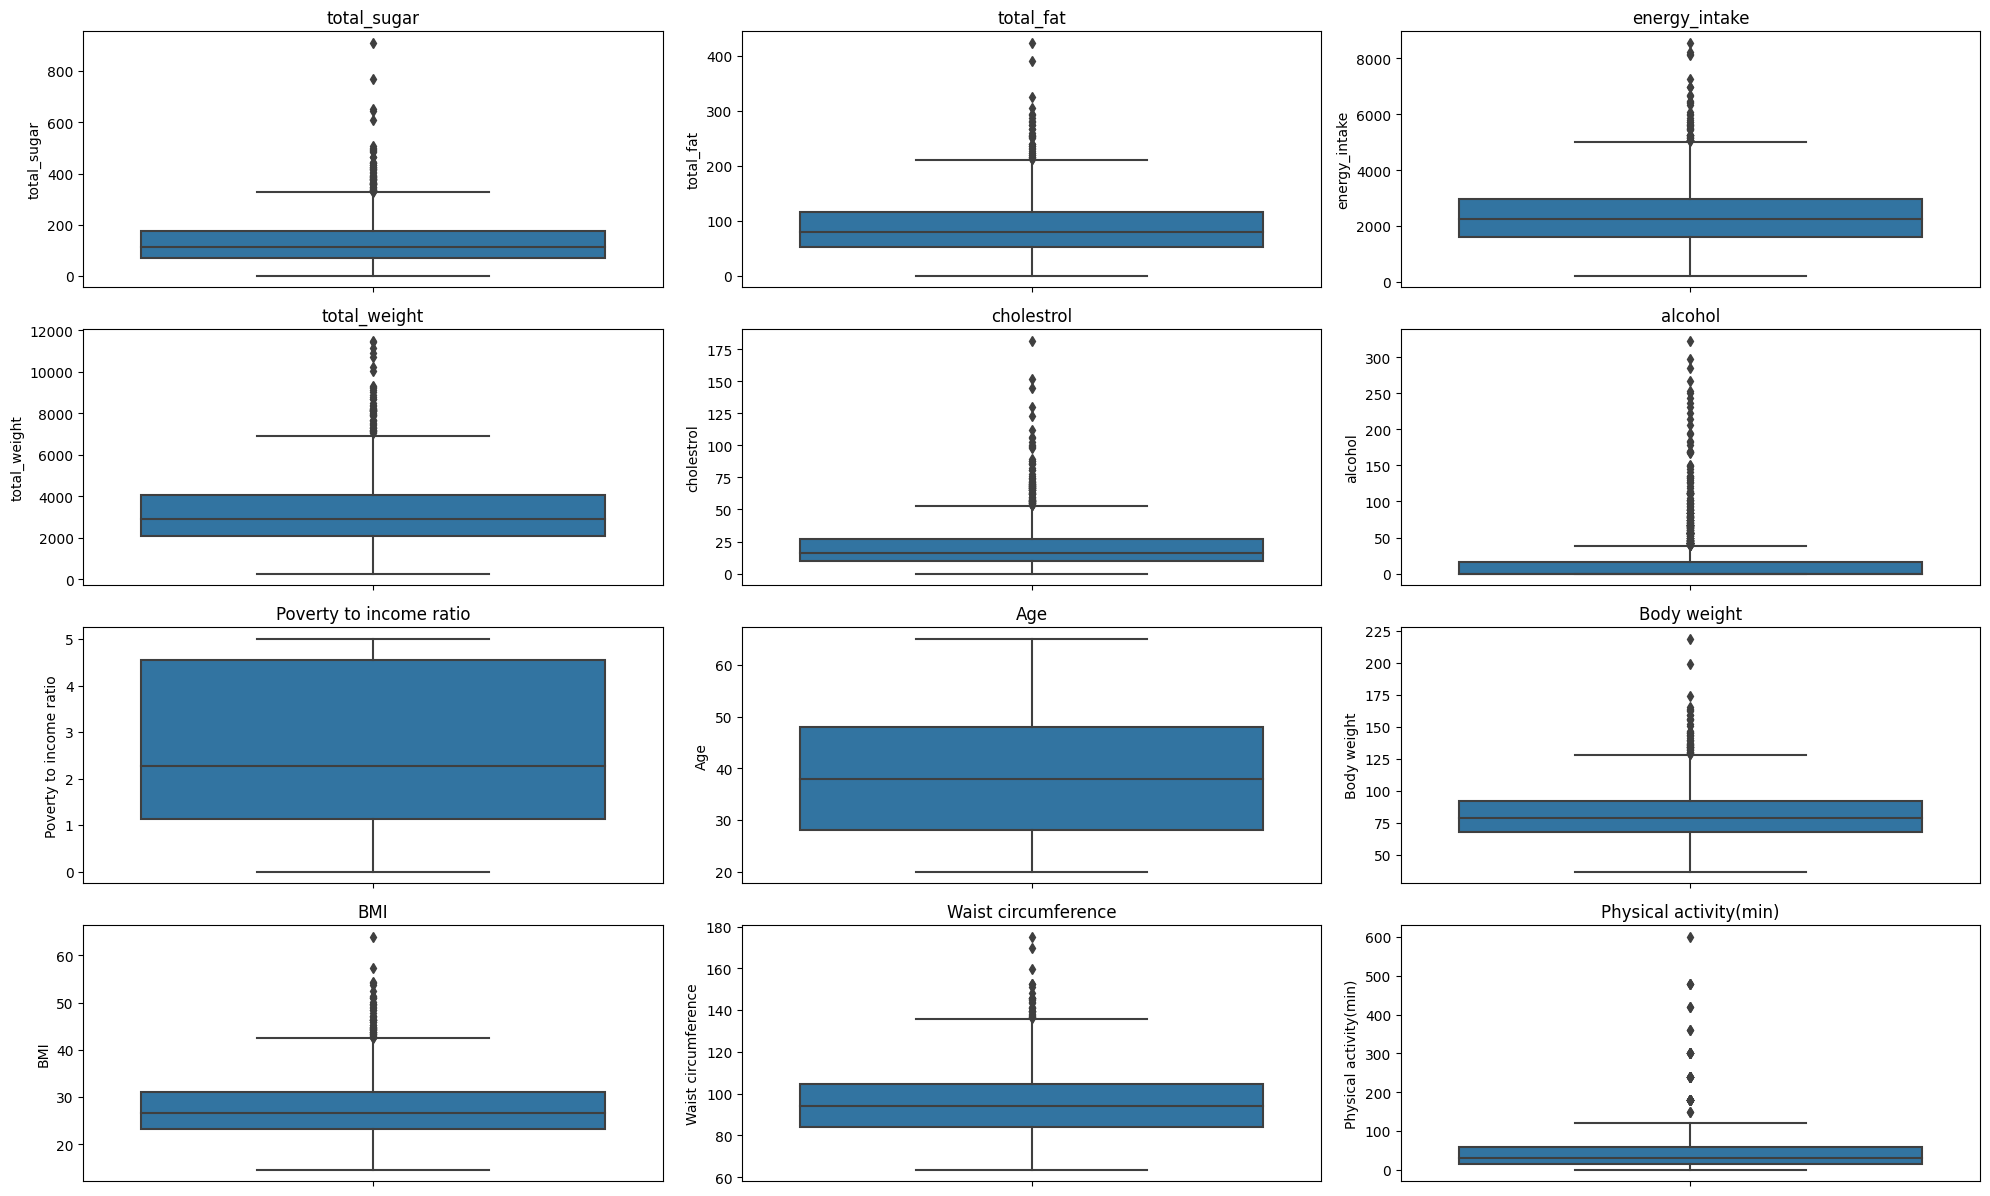

In [174]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns):
    plt.subplot(5, 3, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=column, data=data)  # Add KDE curve
    plt.title(column)

plt.tight_layout()
plt.show()



1. Outliers in total_sugar, total_fat, and energy_intake may represent individuals with extreme dietary habits, which can significantly impact their BMI and risk of obesity.
2. Outliers in Body weight, BMI, and Waist circumference may indicate individuals who are at the extreme ends of the weight spectrum, including severely underweight or obese individuals.
3. Its prudent not to remove outliers as they can represent critical variations in the population that are important for predicting obesity.

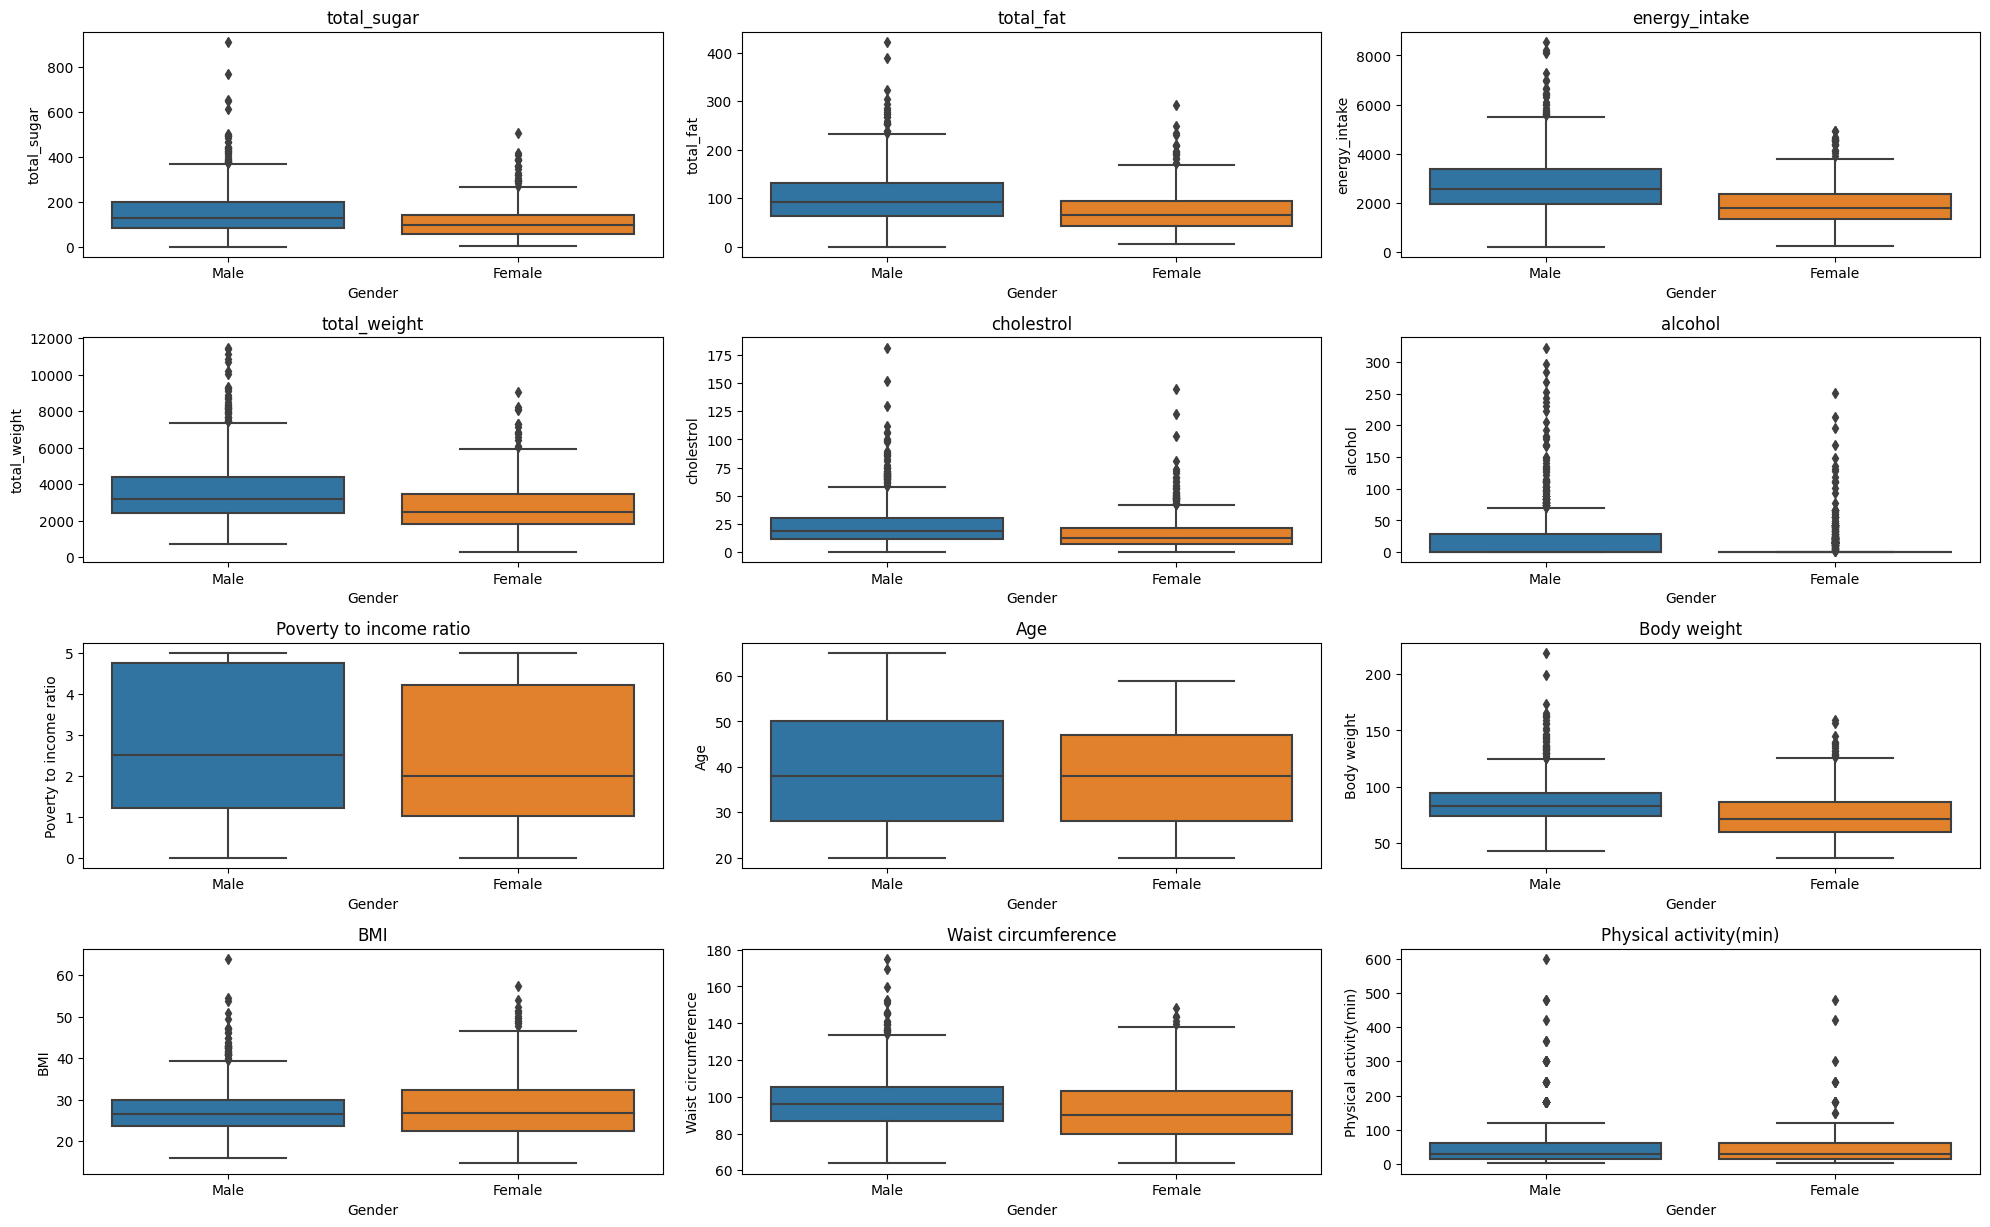

In [175]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns):
    plt.subplot(5, 3, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(x='Gender', y=column, data=data)  # Group by Gender
    plt.title(column)
    plt.xticks([0, 1], ['Male', 'Female'])

plt.tight_layout()
plt.show()

Median values of all columns are higher for males than females except BMI though similar median values are observed for physical activity which is suprising, the following might be the reason:
Females may have higher BMI than males despite similar physical activity levels and lower calorie intake due to several biological and physiological factors. Women typically have higher body fat percentages and different fat distribution patterns compared to men. Hormonal differences, including estrogen, influence fat storage and metabolism, contributing to higher BMI. Additionally, women often have lower muscle mass, which affects their metabolic rate and overall calorie expenditure. These factors combined result in higher BMI among females, despite consuming fewer calories and engaging in similar physical activity levels as males.

'Mexican American','Other Hispanic','Non-Hispanic White' , 'Non-Hispanic Black', 'Other Race' 

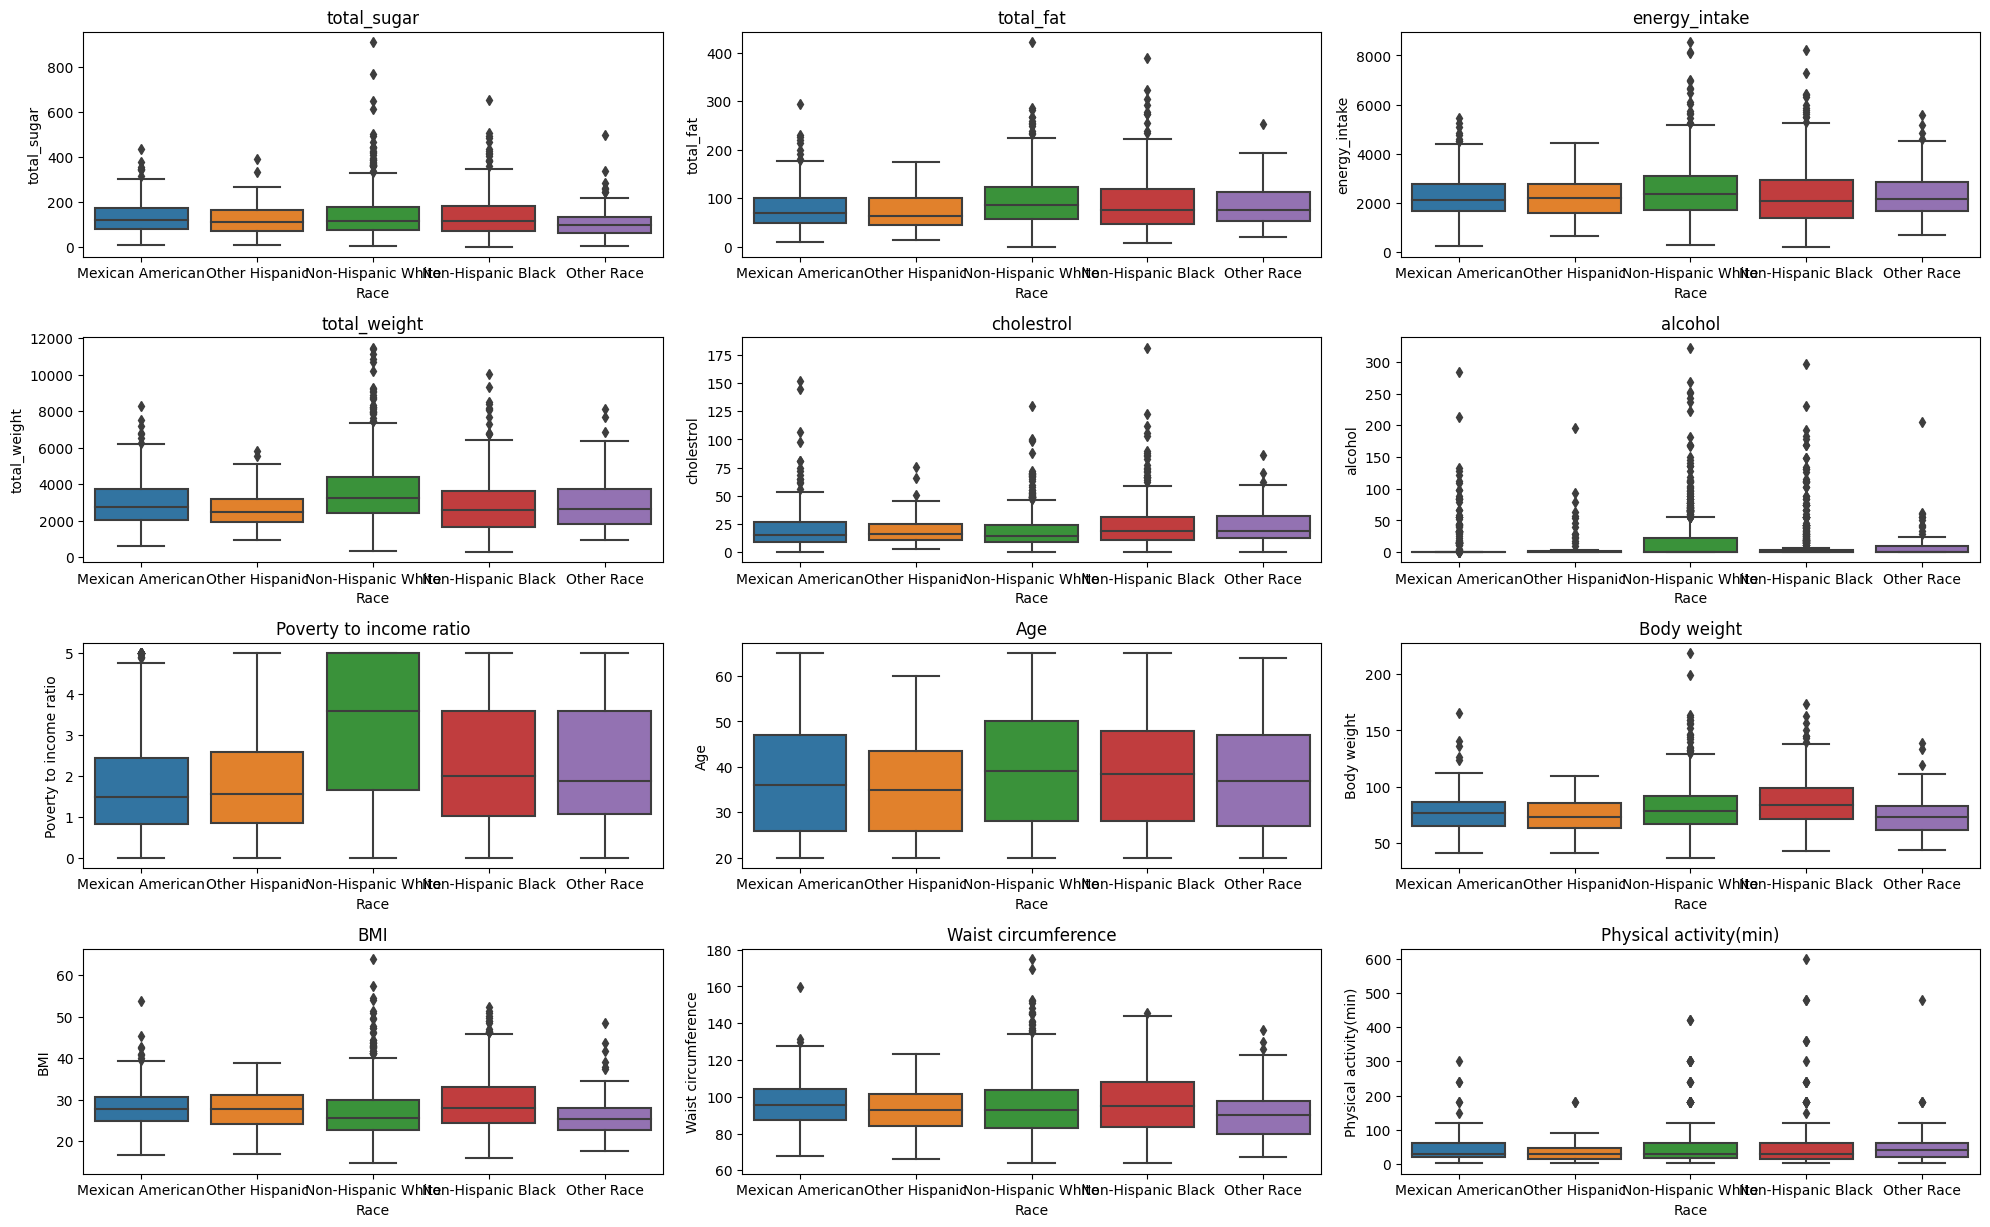

In [176]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns):
    plt.subplot(5, 3, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(x='Race', y=column, data=data)  # Group by Gender
    plt.title(column)
    plt.xticks([0,1,2,3,4],['Mexican American','Other Hispanic','Non-Hispanic White' , 'Non-Hispanic Black', 'Other Race'])

plt.tight_layout()
plt.show()

Higher median values for 'Non-Hispanic White' individuals are observed in most features, except for body weight, BMI, and cholesterol, could be due to several factors. 'Non-Hispanic White' individuals may have different dietary habits, genetic predispositions, and lifestyle choices that impact their nutritional intake and overall health. Factors such as socio-economic status, access to healthcare, and cultural influences can also play a role. Additionally, differences in metabolic rates and body composition between races may contribute to variations in body weight and BMI despite similar levels of physical activity. These factors collectively contribute to the observed differences in median values among racial groups.

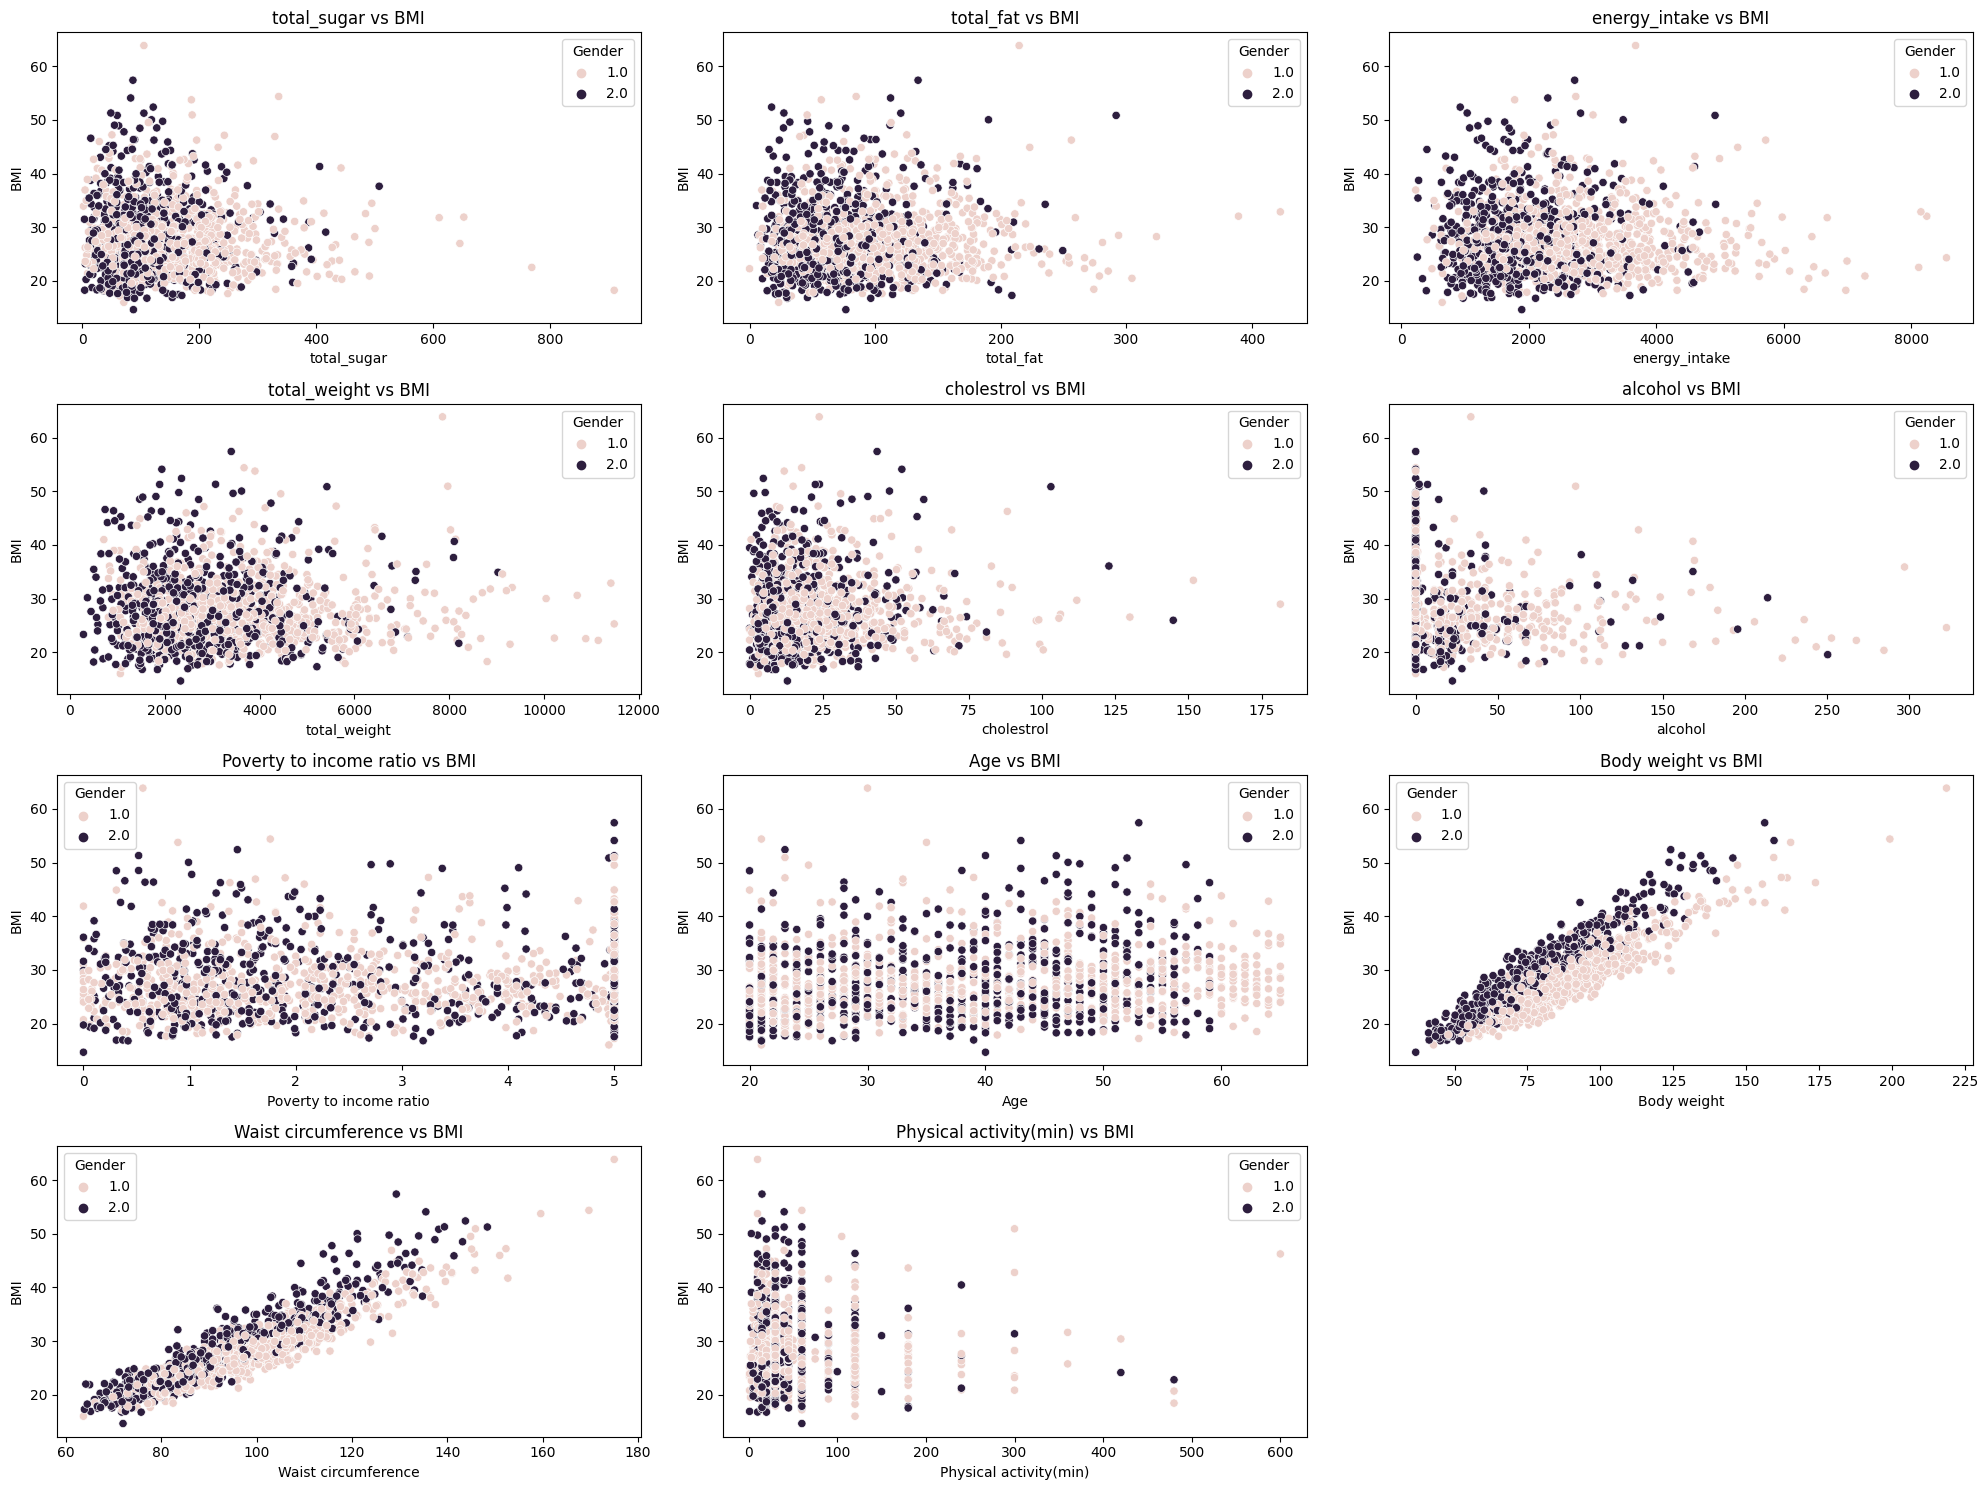

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns to visualize
columns = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight', 
           'cholestrol', 'alcohol', 'Poverty to income ratio', 'Age', 
           'Body weight', 'Waist circumference', 'Physical activity(min)']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns):
    plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
    sns.scatterplot(x=data[column], y=data['BMI'], hue=data['Gender'])
    plt.title(f'{column} vs BMI')

plt.tight_layout()
plt.show()


The positive correlation between BMI and body weight, waist circumference, and slight correlations with nutritional intake (total_sugar, total_fat, energy_intake, total_weight, cholesterol) can be attributed to several factors. BMI, a measure of body fat based on height and weight, naturally correlates with body weight and waist circumference, which are direct indicators of overall body size and fat distribution. The slight correlations with nutritional intake suggest that higher consumption of sugar, fat, and calories can contribute to higher body weight and BMI, though other factors such as physical activity levels, genetics, and metabolic rate also play significant roles in determining BMI.

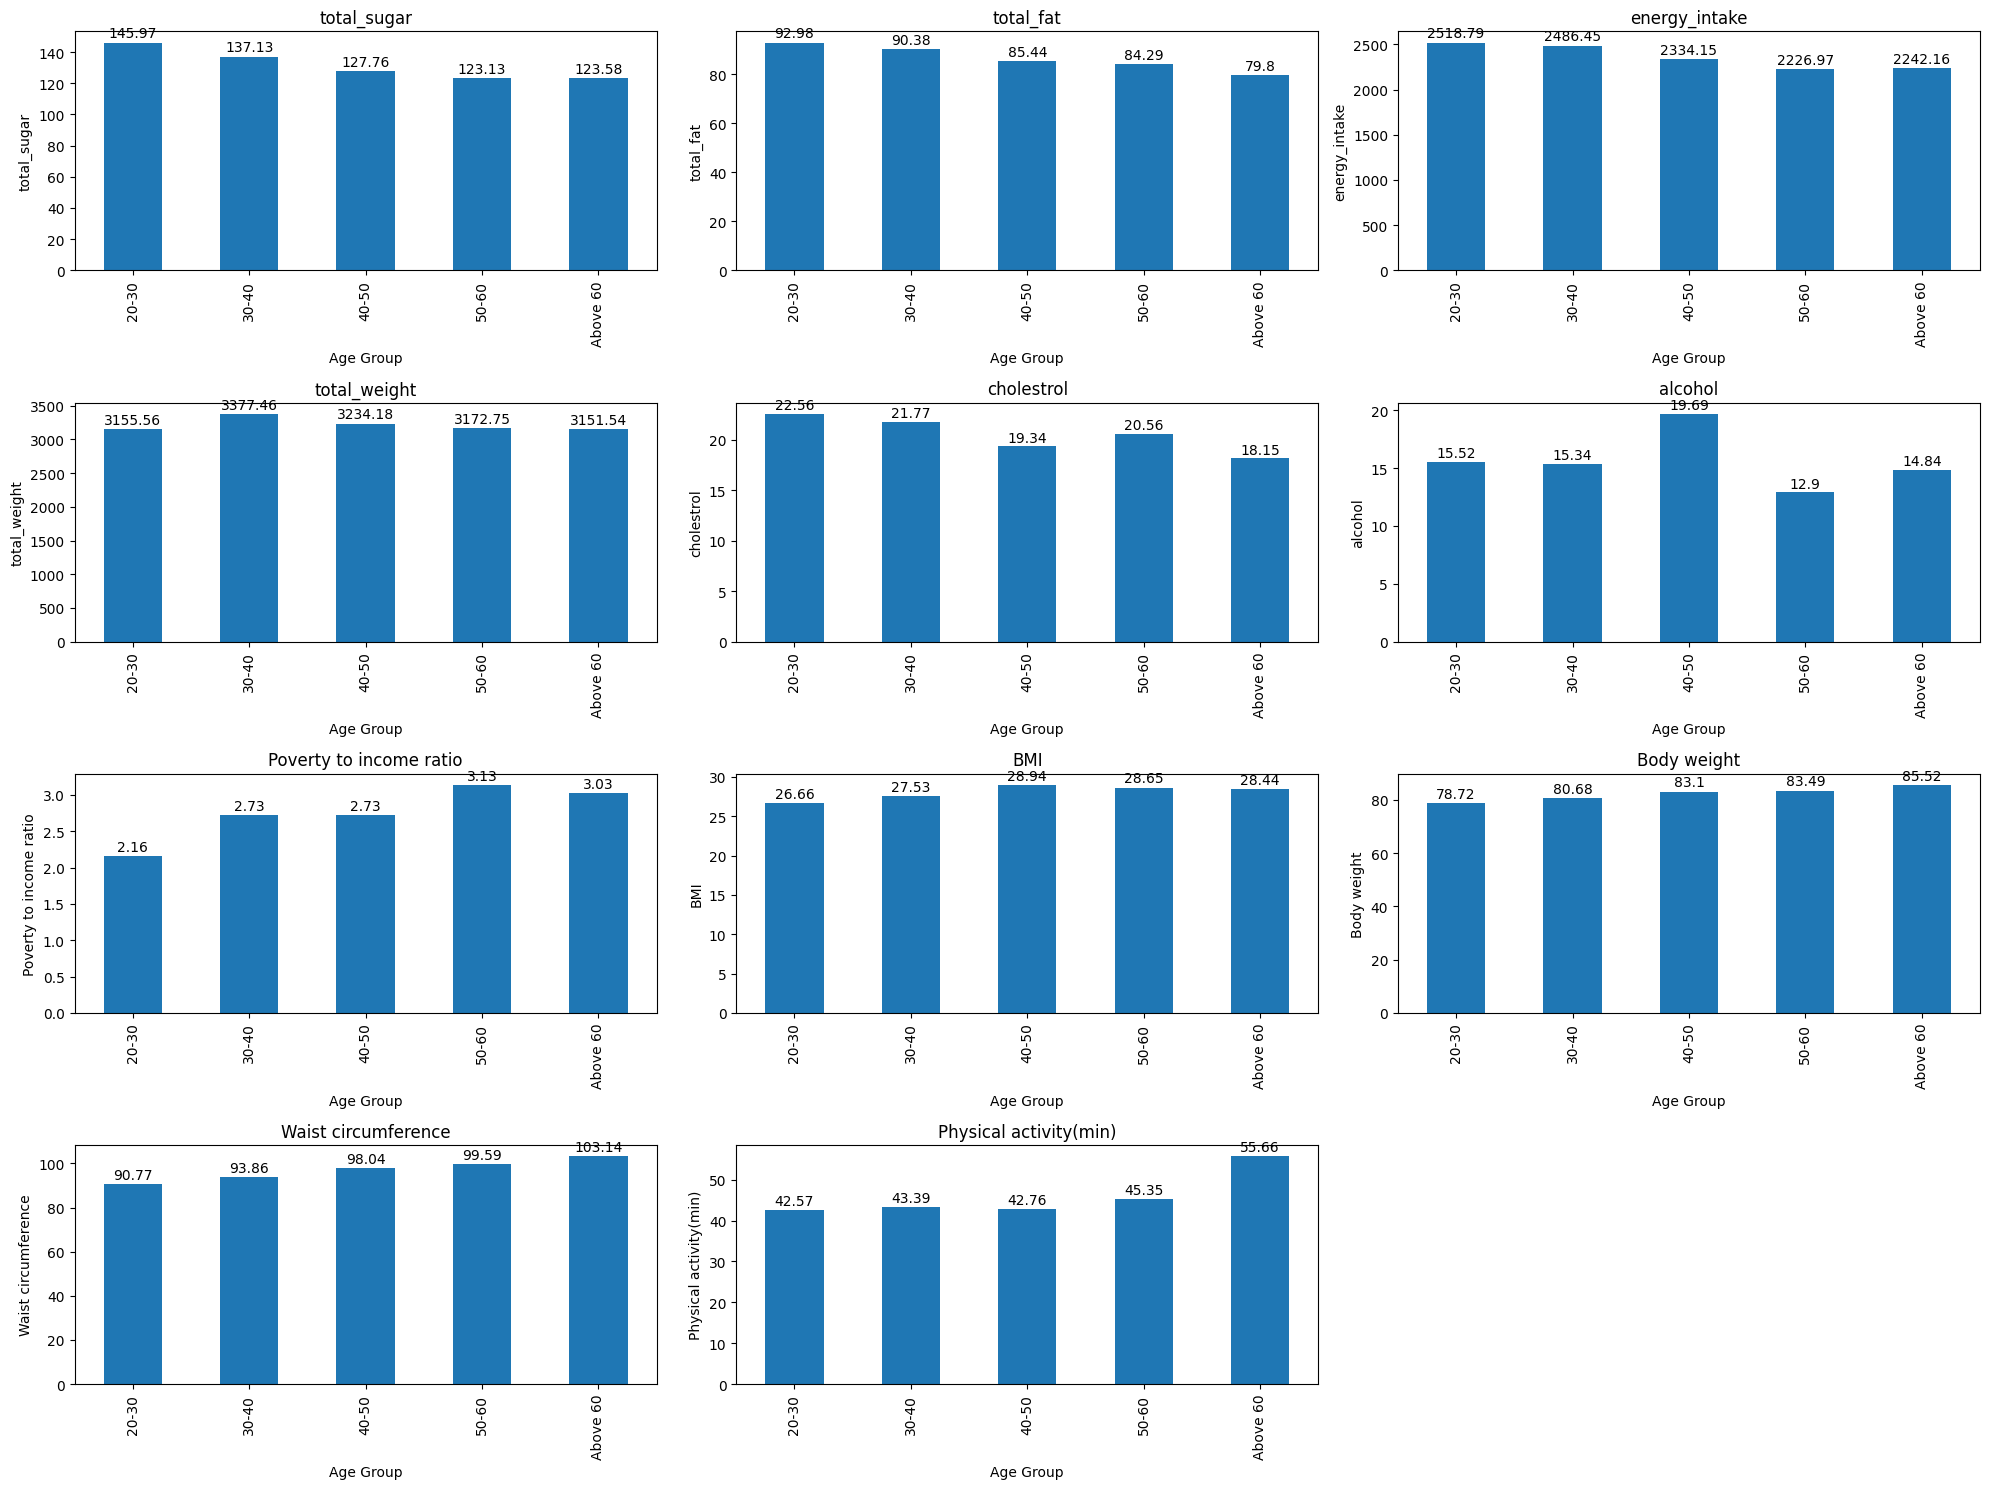

In [178]:
new_df = data.copy()

# Create a new column for age groups
age_groups = []
for col in new_df['Age']:
    if col >= 20 and col < 30:
        age_groups.append("20-30")
    elif col >= 30 and col < 40:
        age_groups.append("30-40")
    elif col >= 40 and col < 50:
        age_groups.append("40-50")
    elif col >= 50 and col < 60:
        age_groups.append("50-60")
    elif col >= 60:
        age_groups.append("Above 60")

new_df['Age Group'] = age_groups

columns = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight', 
           'cholestrol', 'alcohol', 'Poverty to income ratio', 'BMI' ,
           'Body weight', 'Waist circumference', 'Physical activity(min)']

plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns):
    plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
    ax = new_df.groupby('Age Group')[column].mean().plot(kind='bar')
    plt.title(column)
    plt.xlabel('Age Group')
    plt.ylabel(column)
    
    # Annotate bars with mean values
    means = new_df.groupby('Age Group')[column].mean()
    for j, mean in enumerate(means):
        ax.text(j, mean + (mean * 0.01), round(mean, 2), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


The trends observed suggest a complex interplay of metabolic rates, lifestyle choices, physical activity, and dietary habits affecting BMI across different age groups. Younger adults maintain lower BMI despite higher caloric intake due to higher metabolism, while older adults experience higher BMI due to slower metabolism, changes in body composition, and lifestyle factors despite being more physically active and consuming fewer calories.
By understanding these patterns, interventions can be better targeted for different age groups to manage and prevent obesity, focusing on promoting healthy dietary habits and maintaining physical activity throughout life.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13868\2221942292.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13868\2221942292.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13868\2221942292.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Local\Temp\ipykernel_13868\2221942292.py:19: FutureWarning:

Th

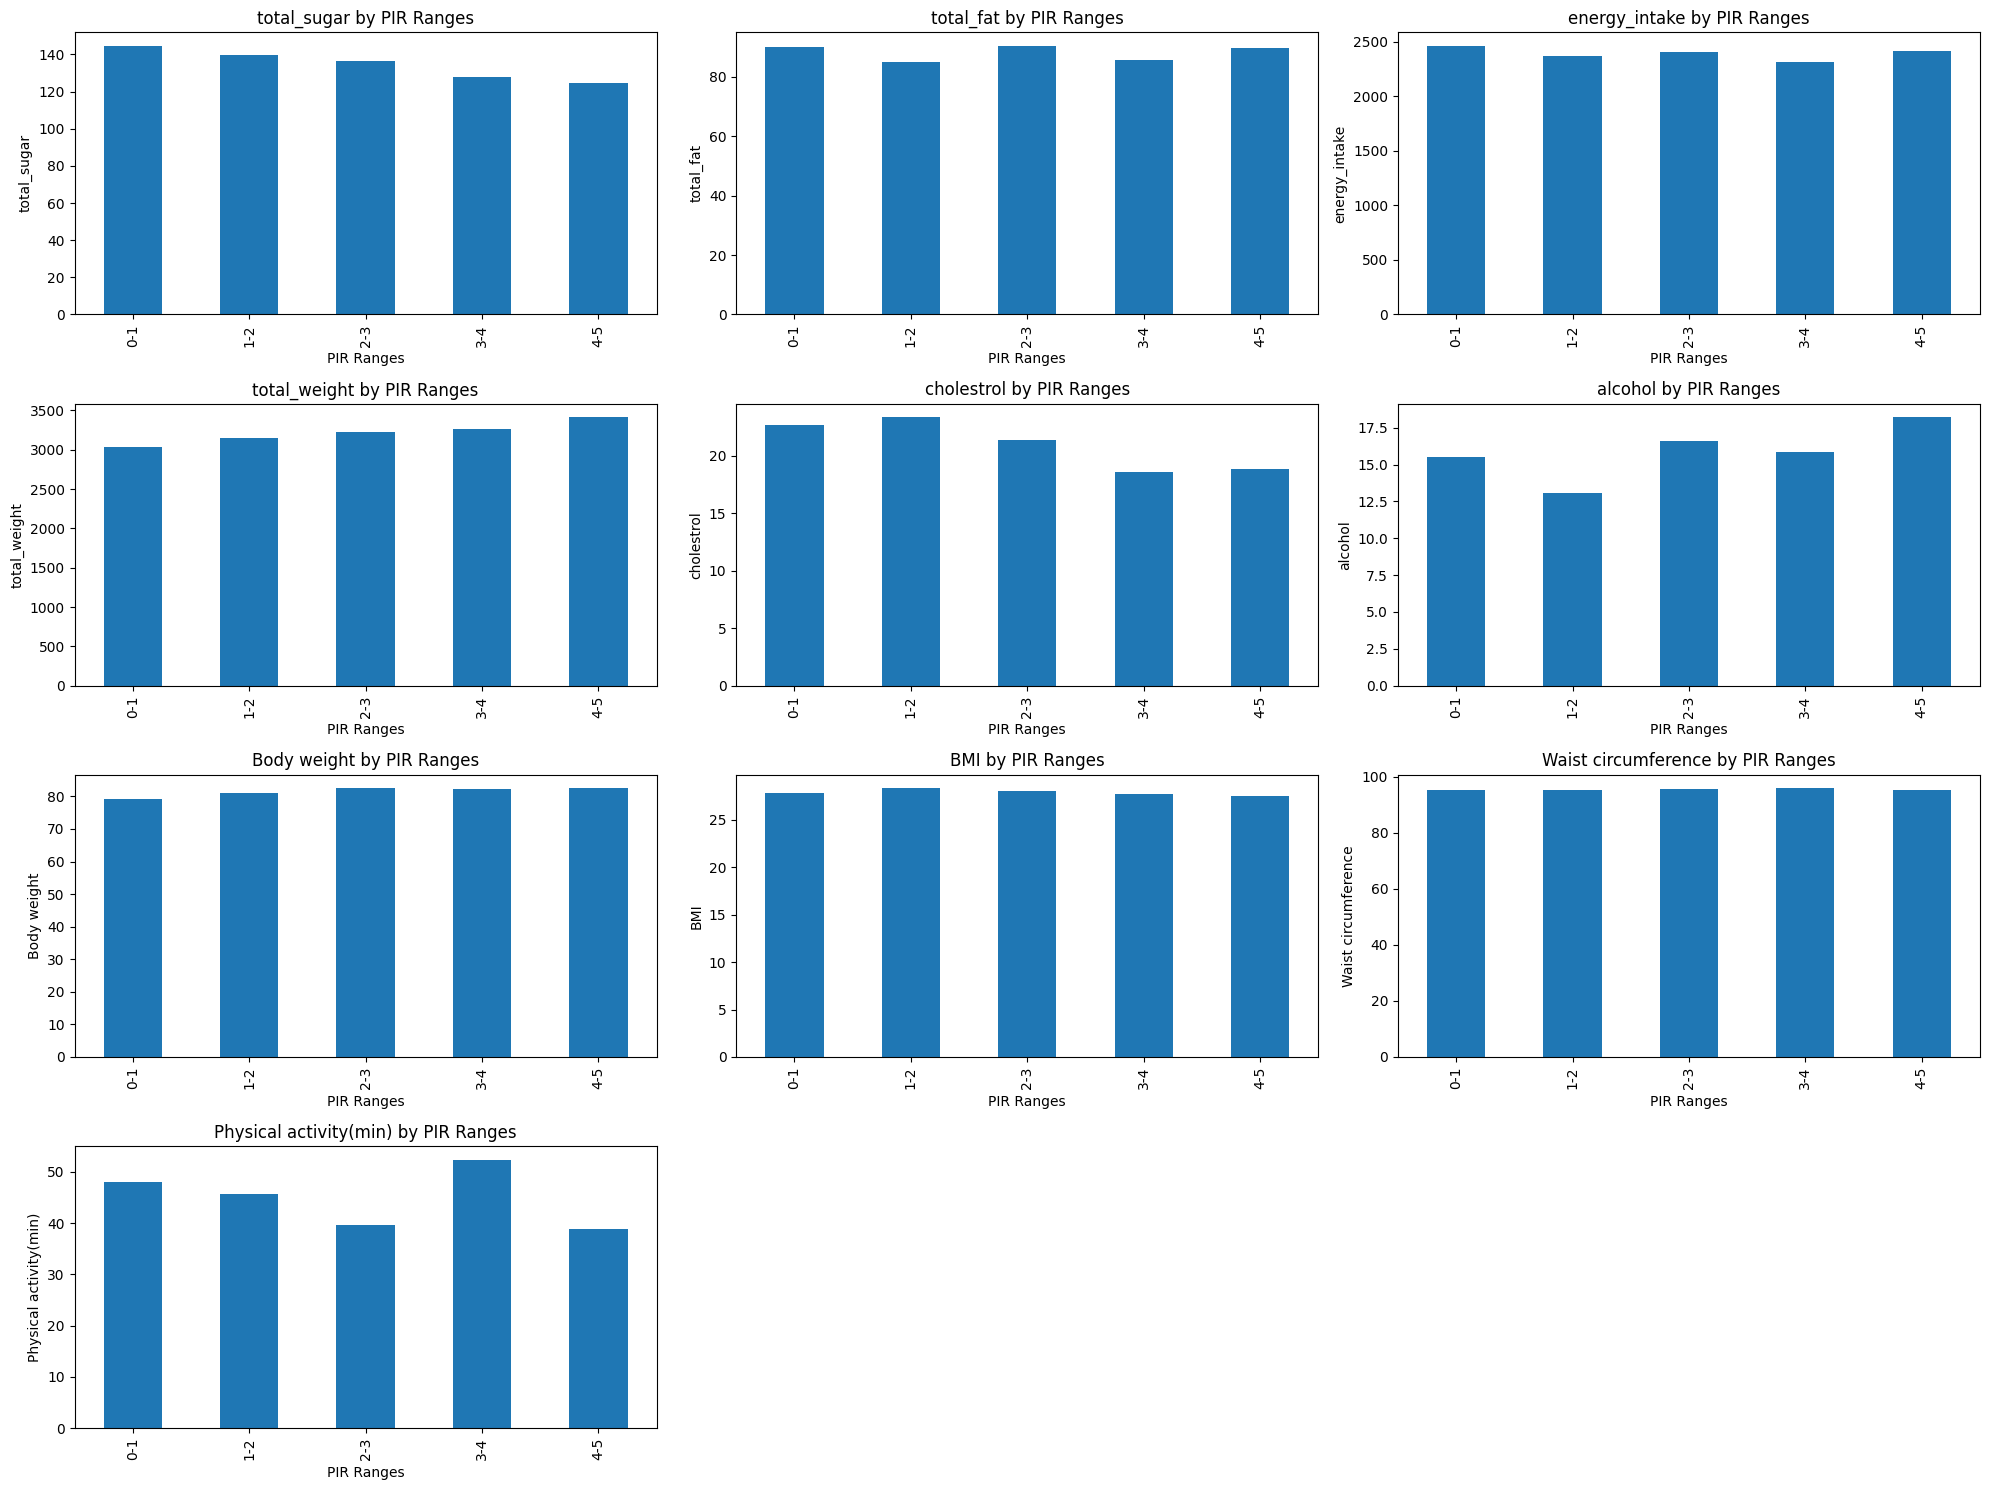

In [179]:
new_df['PIR Ranges'] = pd.cut(new_df['Poverty to income ratio'], bins=[0, 1, 2, 3, 4, float('inf')],
                             labels=["0-1","1-2","2-3", "3-4", "4-5"], right=False)

# List of columns to visualize
columns = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight', 
           'cholestrol', 'alcohol', 'Body weight', 'BMI',
           'Waist circumference', 'Physical activity(min)']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each column and create a subplot
for i, column in enumerate(columns):
    plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
    new_df.groupby('PIR Ranges')[column].mean().plot(kind='bar')
    plt.title(f'{column} by PIR Ranges')
    plt.xlabel('PIR Ranges')
    plt.ylabel(column)
    means = new_df.groupby('PIR Ranges')[column].mean()
    for j, mean in enumerate(means):
        ax.text(j, mean + (mean * 0.01), round(mean, 2), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


pir can be removed

In [13]:
obeseness = []
for col in data['BMI']:
    if col<18.5:
        obeseness.append('underwt')
    elif col >= 18.5 and col < 24.9:
        obeseness.append('nrmlwt')
    elif col >= 24.9 and col < 29.9:
        obeseness.append('overwt')
    else:
        obeseness.append('obese')

data['Obeseness'] = obeseness

In [14]:
data.head()

total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
0       107.66      70.08         2176.0       2098.06   19.714286   
1        84.92      53.74         1042.0       1040.79   22.000000   
2        45.65      22.97          839.0       1401.61    5.900000   
3       163.69     137.59         4190.0       7489.00   51.615385   
4        54.95      28.36         1425.0       1713.75    4.588235   

        alcohol  Gender  Race  Poverty to income ratio   Age  Body weight  \
0  7.556647e-78     2.0   1.0                     0.21  37.0         45.1   
1  5.937366e-78     2.0   4.0                     0.33  57.0         90.3   
2  1.410000e+01     2.0   3.0                     5.00  51.0         52.3   
3  1.674000e+02     1.0   3.0                     2.40  25.0        108.3   
4  1.530000e+01     2.0   3.0                     1.61  25.0         57.4   

     BMI  Waist circumference  Physical activity(min) Obeseness  
0  19.34                 77.8                    15.0    nrmlwt  
1  32.07                103.0                    45.0     obese  
2  20.61                 70.0                    15.0    nrmlwt  
3  31.17                107.4                    30.0     obese  
4  22.09                 77.0                    10.0    nrmlwt

In [35]:
data.Obeseness.value_counts()

Obeseness
nrmlwt     513
overwt     499
obese      453
underwt     35
Name: count, dtype: int64

In [33]:
columns = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight', 
           'cholestrol', 'alcohol','Age' ,'Poverty to income ratio', 'BMI',
           'Body weight', 'Waist circumference', 'Physical activity(min)']

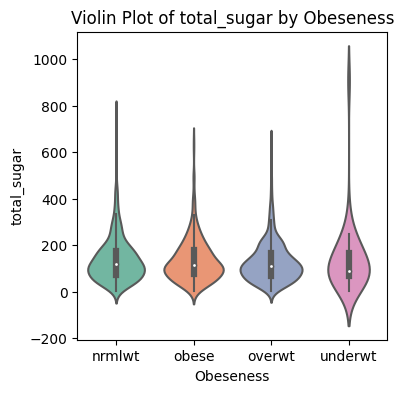

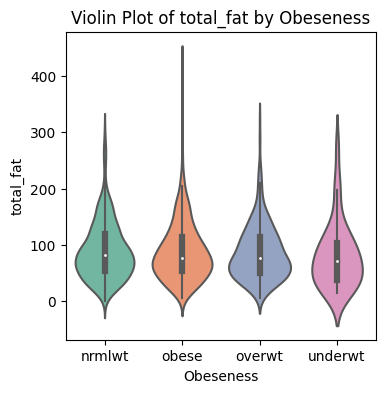

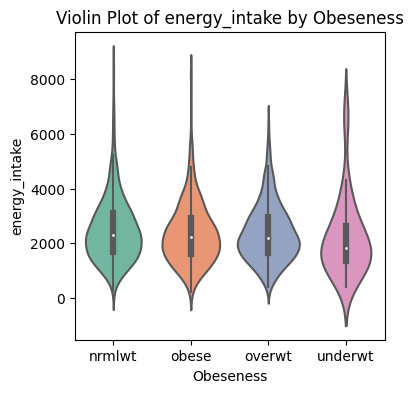

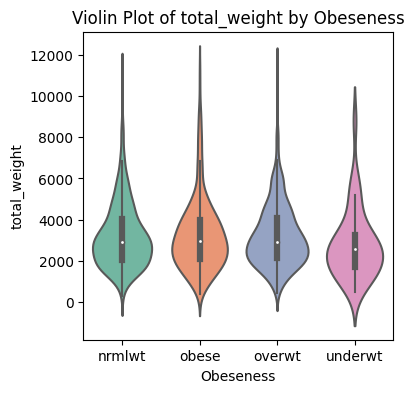

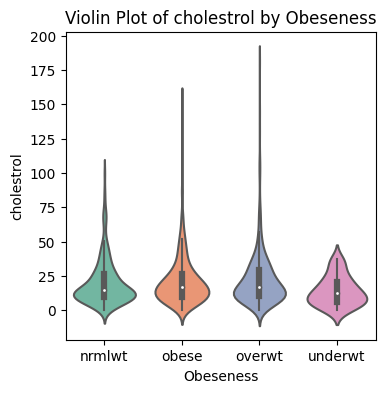

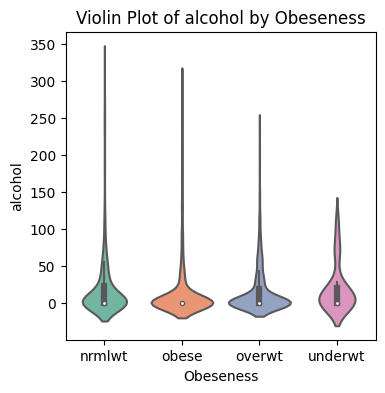

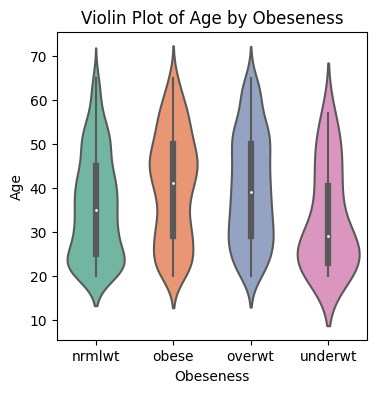

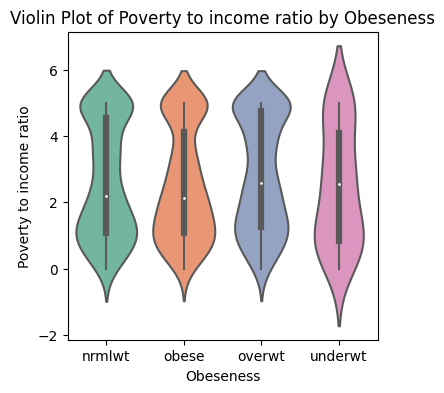

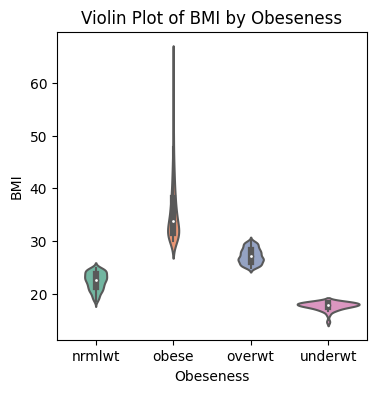

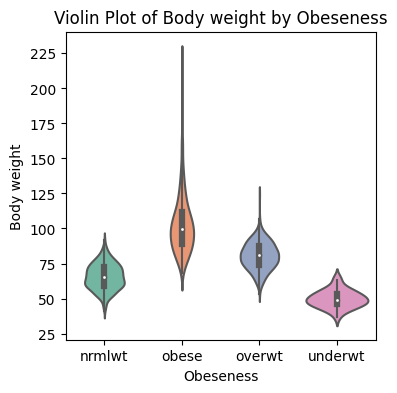

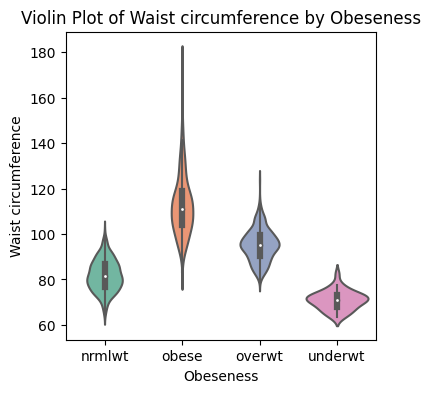

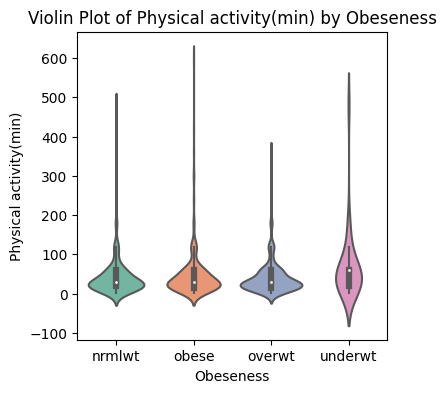

In [34]:
for i in columns:
    plt.figure(figsize=(4, 4))
    sns.violinplot(x='Obeseness', y=i, data=data, palette='Set2')
    plt.title(f'Violin Plot of {i} by Obeseness')
    plt.xlabel('Obeseness')
    plt.ylabel(i)
    plt.show()


Based on  observations and the violin plots, here are the insights and potential factors leading to obesity, as well as the factors you might consider dropping:

Insights and Factors Leading to Obesity:
Dietary Intake:
Total Sugar, Total Fat, Energy Intake: Similar median values for nrmlwt, obese, and overwt suggest that high intake of sugar and fat is a common factor. The slightly higher median for obese and overwt indicates these factors contribute to weight gain but are not drastically different among these groups.
Cholesterol: Higher values in obese and overwt groups indicate a correlation with obesity. High cholesterol could be a significant indicator of obesity-related health risks.

Physical Measurements:
BMI, Body Weight, Waist Circumference: Significantly higher median values in obese compared to overwt and nrmlwt indicate these are strong indicators of obesity. These measurements directly correlate with excess body fat and health risks.

Age:
Age Distribution: Obese and overweight individuals are typically older (37-50 years), while normal weight individuals are slightly younger (30-35 years), and underweight individuals are the youngest (20-30 years). This suggests that age might play a role in weight gain over time.

Socioeconomic Factors:
Poverty to Income Ratio: Similar median values across all weight categories suggest this factor might not have a strong direct correlation with obesity in your dataset. However, it can still be an important socioeconomic indicator.

Lifestyle Factors:
Physical Activity: Similar levels of physical activity across different weight categories suggest that physical activity alone might not be enough to distinguish between weight categories. However, it's crucial for overall health.

Alcohol Consumption:
Similar median values across categories suggest that alcohol might not be a strong independent predictor of obesity in your dataset. However, it can still contribute to overall calorie intake and health risks.

Factors to Consider Dropping:
Some factors show less variation across different weight categories and might be considered for dropping :
Poverty to Income Ratio: Since the median values are similar across weight categories, it might not be a significant factor in this dataset.
Alcohol Consumption: Similar median values across categories suggest it might not be a strong predictor of obesity independently.

In [68]:
df = data.copy()

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame
columns_to_combine = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight']

# Apply log transformation to reduce skewness
df[columns_to_combine] = df[columns_to_combine].apply(np.log1p)

# Standardize the columns
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(df[columns_to_combine])

# Perform PCA
pca = PCA(n_components=1)
principal_components = pca.fit_transform(df[columns_to_combine])

# Create a composite metric based on the first principal component
df['diet_pca_composite'] = principal_components[:, 0]

# Now you can use 'diet_pca_composite' in your analysis


In [70]:
df.head()

total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
0     4.688224   4.263806       7.685703      7.649245   19.714286   
1     4.453417   4.002595       6.949856      6.948696   22.000000   
2     3.842673   3.176803       6.733402      7.246090    5.900000   
3     5.104065   4.931520       8.340695      8.921324   51.615385   
4     4.024458   3.379633       7.262629      7.447023    4.588235   

        alcohol  Gender  Race  Poverty to income ratio   Age  Body weight  \
0  7.556647e-78     2.0   1.0                     0.21  37.0         45.1   
1  5.937366e-78     2.0   4.0                     0.33  57.0         90.3   
2  1.410000e+01     2.0   3.0                     5.00  51.0         52.3   
3  1.674000e+02     1.0   3.0                     2.40  25.0        108.3   
4  1.530000e+01     2.0   3.0                     1.61  25.0         57.4   

     BMI  Waist circumference  Physical activity(min) Obeseness  \
0  19.34                 77.8                    15.0    nrmlwt   
1  32.07                103.0                    45.0     obese   
2  20.61                 70.0                    15.0    nrmlwt   
3  31.17                107.4                    30.0     obese   
4  22.09                 77.0                    10.0    nrmlwt   

   diet_pca_composite  
0            0.121106  
1            0.980291  
2            1.800855  
3           -1.217042  
4            1.267274

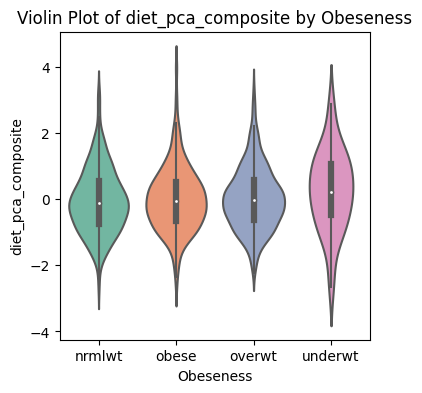

In [71]:
plt.figure(figsize=(4, 4))
sns.violinplot(x='Obeseness', y='diet_pca_composite', data=df, palette='Set2')
plt.title('Violin Plot of diet_pca_composite by Obeseness')
plt.xlabel('Obeseness')
plt.ylabel('diet_pca_composite')
plt.show()

In [38]:
underwt = data[data['BMI'] < 18.5]
nrmlwt = data[(data['BMI'] >= 18.5) & (data['BMI'] < 24.9)]
overwt = data[(data['BMI'] >= 24.9) & (data['BMI'] < 29.9)]
obese = data[data['BMI'] >= 30]

In [39]:
underwt.head()

total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
156       153.50      46.03         1352.0       1512.80   25.166667   
159       110.17      30.13          968.0       1524.13    7.700000   
199       213.61     103.85         2741.0       2663.99    8.600000   
281        36.45      13.99          391.0        498.41    2.750000   
368        70.76      23.19          640.0       1061.96    3.000000   

          alcohol  Gender  Race  Poverty to income ratio   Age  Body weight  \
156  3.238563e-78     2.0   4.0                     0.31  21.0         47.4   
159  4.600000e+00     2.0   3.0                     3.20  27.0         45.1   
199  1.400000e+01     1.0   3.0                     1.07  23.0         50.5   
281  2.159042e-78     2.0   4.0                     1.45  29.0         49.5   
368  2.698803e-78     1.0   4.0                     4.95  21.0         42.8   

       BMI  Waist circumference  Physical activity(min) Obeseness  
156  16.91                 65.2                     1.0   underwt  
159  16.79                 71.7                    10.0   underwt  
199  18.15                 70.4                    60.0   underwt  
281  18.18                 67.1                    60.0   underwt  
368  16.01                 63.7                   120.0   underwt

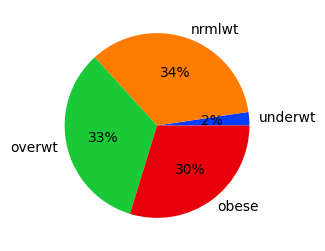

In [36]:
l = [35,513,499,443]
x = ['underwt','nrmlwt','overwt','obese']
plt.figure(figsize=(3, 3))
palette_color = sns.color_palette('bright') 
# plotting data on chart 
plt.pie(l, labels=x, colors=palette_color, autopct='%.0f%%') 
# displaying chart 
plt.show() 

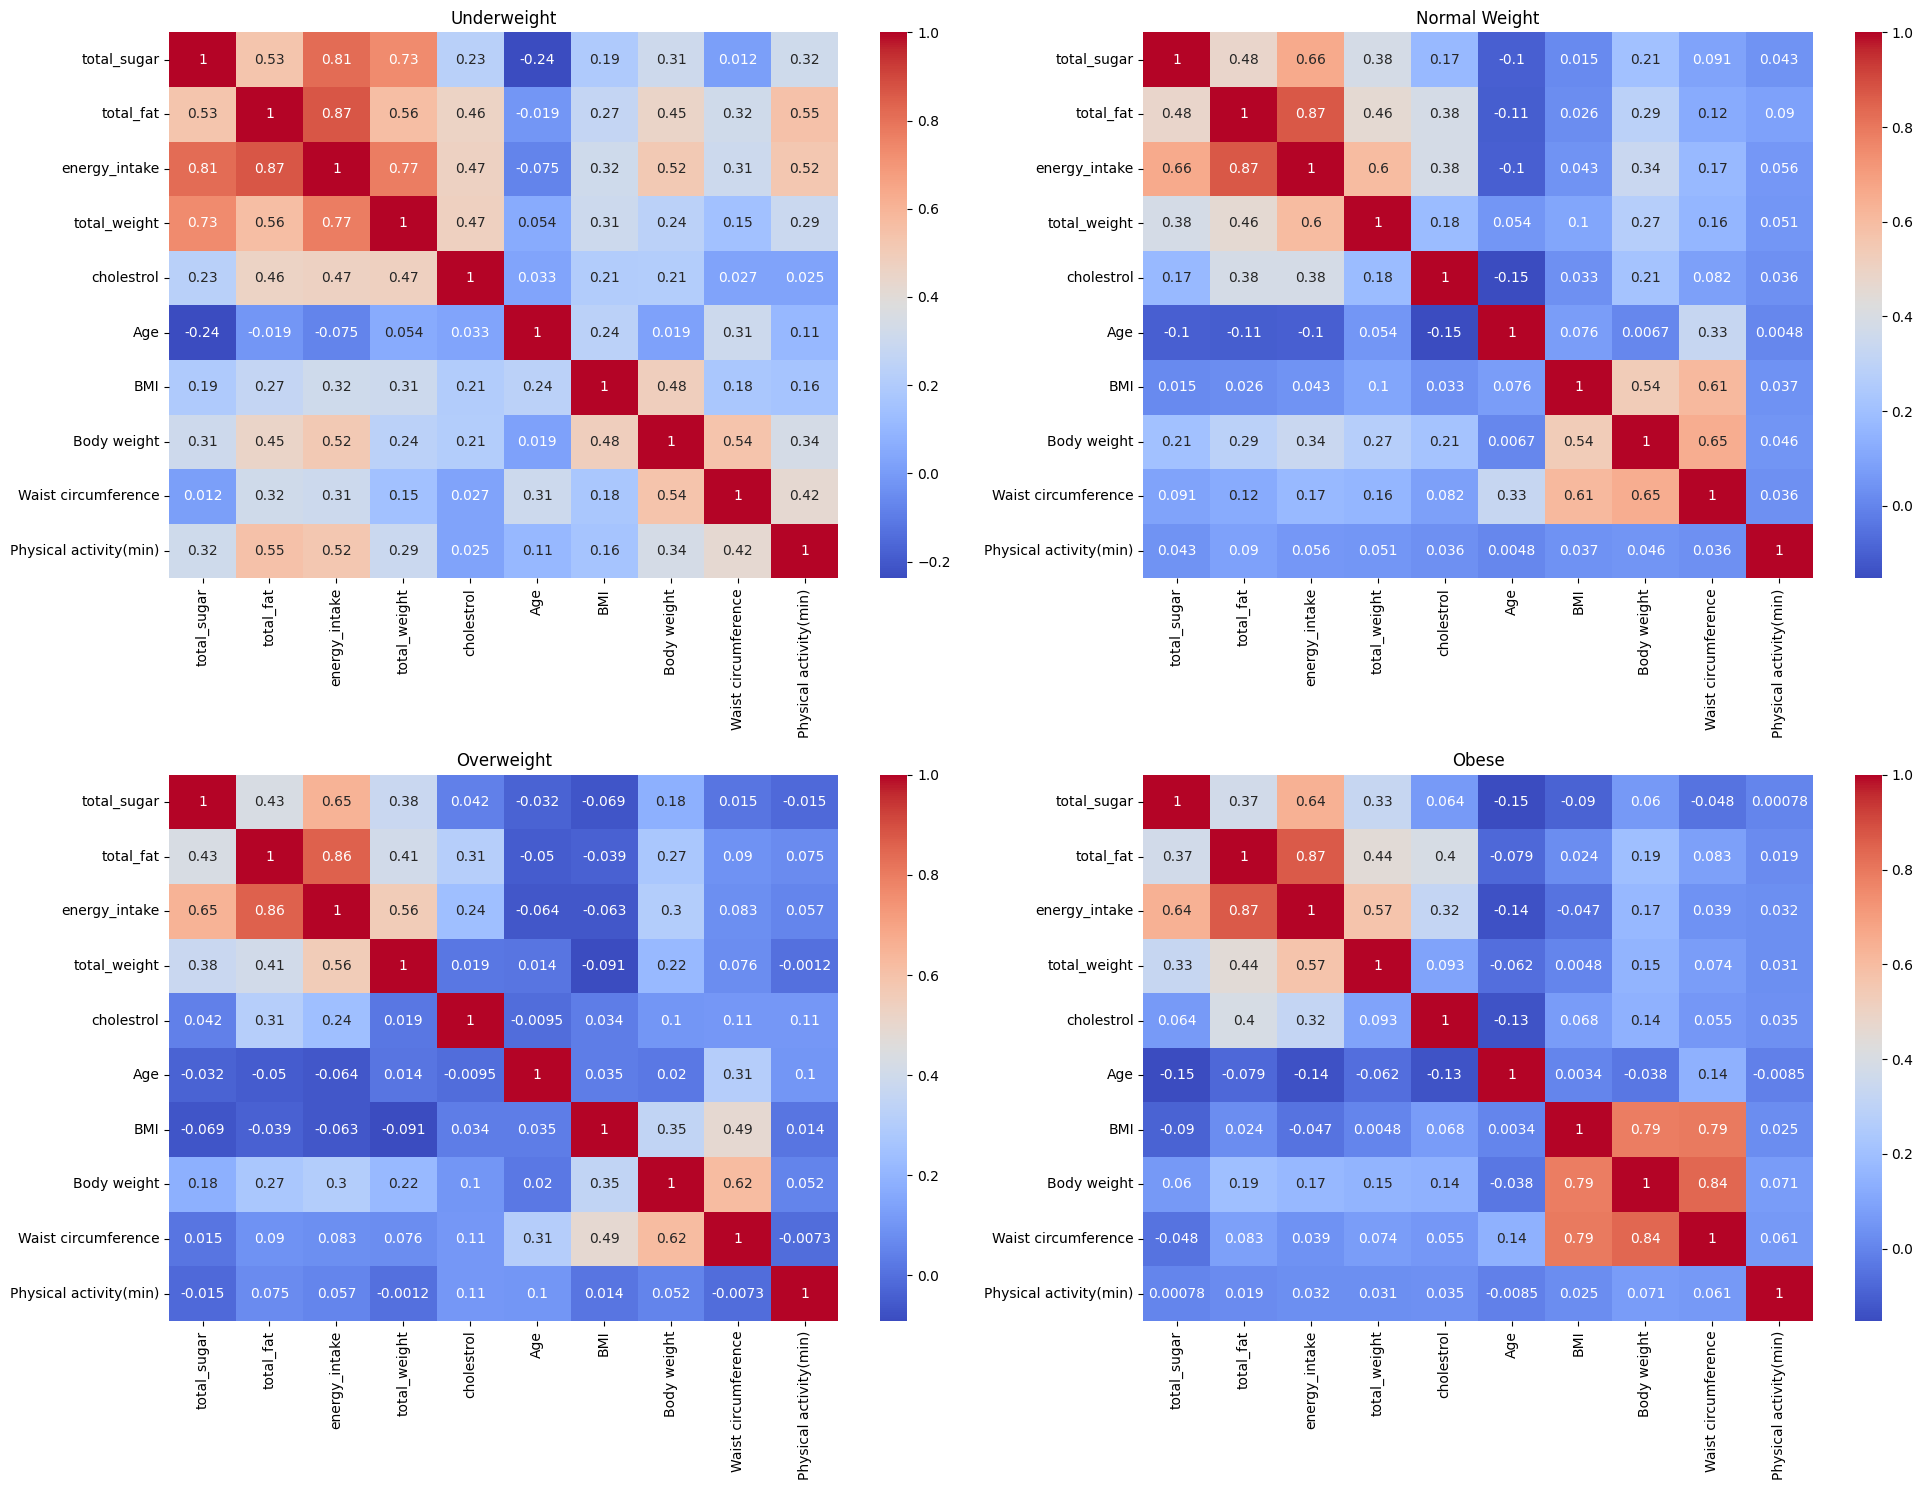

In [72]:
columns = ['total_sugar', 'total_fat', 'energy_intake', 'total_weight', 
           'cholestrol','Age' , 'BMI',
           'Body weight', 'Waist circumference', 'Physical activity(min)']
# Function to create a pivot table for heatmap
def create_pivot_table(df, columns):
    return df[columns].corr()

# Plot heatmaps as subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

sns.heatmap(create_pivot_table(underwt, columns), ax=axes[0, 0], cmap='coolwarm', annot=True)
axes[0, 0].set_title('Underweight')

sns.heatmap(create_pivot_table(nrmlwt, columns), ax=axes[0, 1], cmap='coolwarm', annot=True)
axes[0, 1].set_title('Normal Weight')

sns.heatmap(create_pivot_table(overwt, columns), ax=axes[1, 0], cmap='coolwarm', annot=True)
axes[1, 0].set_title('Overweight')

sns.heatmap(create_pivot_table(obese, columns), ax=axes[1, 1], cmap='coolwarm', annot=True)
axes[1, 1].set_title('Obese')

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



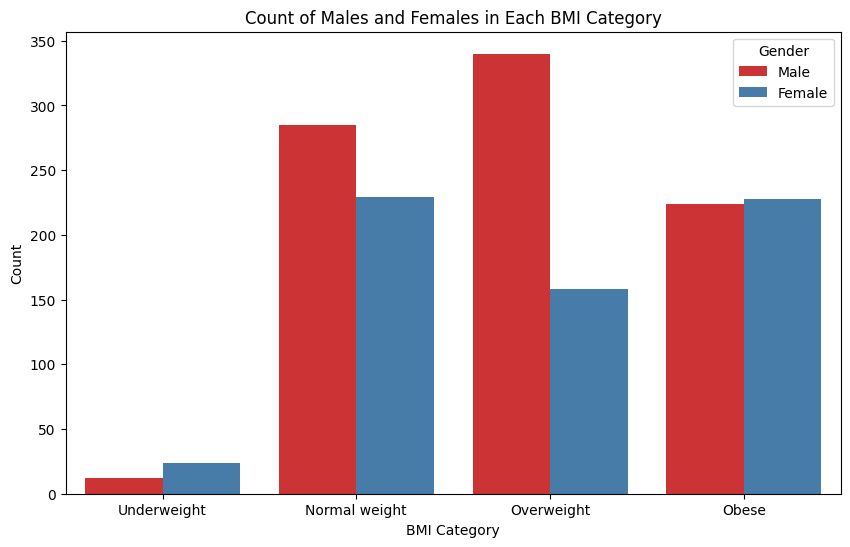

In [189]:
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                              labels=['Underweight', 'Normal weight', 'Overweight', 'Obese'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(data=data, x='BMI_Category', hue='Gender', palette='Set1')

# Add title and labels
plt.title('Count of Males and Females in Each BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])

plt.show()


In [37]:
def boxplot(data):
    male_data = data[data['Gender'] == 1]  # RIAGENDR: 1 for Male
    female_data = data[data['Gender'] == 2]  # RIAGENDR: 2 for Female

    # Set up the matplotlib figure
    plt.figure(figsize=(20, 15))

    # Loop through each column and create a subplot
    for i, column in enumerate(columns):
        plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
        box_data = [male_data[column].dropna(), female_data[column].dropna()]
        box = plt.boxplot(box_data, labels=['Male', 'Female'], patch_artist=True, showmeans=True)
        plt.title(column)

        # Annotate each boxplot
        for j in range(len(box_data)):
            median = np.median(box_data[j])
            mean = np.mean(box_data[j])
            min_val = np.min(box_data[j])
            max_val = np.max(box_data[j])
            q1 = np.percentile(box_data[j], 25)
            q3 = np.percentile(box_data[j], 75)

            plt.annotate(f'Median: {median:.2f}', xy=(j + 1, median), xytext=(j + 1.1, median),
                         arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='blue')
            # plt.annotate(f'Mean: {mean:.2f}', xy=(j + 1, mean), xytext=(j + 1.1, mean),
            #              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='green')
            # plt.annotate(f'Min: {min_val:.2f}', xy=(j + 1, min_val), xytext=(j + 1.1, min_val),
            #              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='red')
            # plt.annotate(f'Max: {max_val:.2f}', xy=(j + 1, max_val), xytext=(j + 1.1, max_val),
            #              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='red')
            # plt.annotate(f'Q1: {q1:.2f}', xy=(j + 1, q1), xytext=(j + 1.1, q1),
            #              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='purple')
            # plt.annotate(f'Q3: {q3:.2f}', xy=(j + 1, q3), xytext=(j + 1.1, q3),
            #              arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8, color='purple')

    plt.tight_layout()
    plt.show()

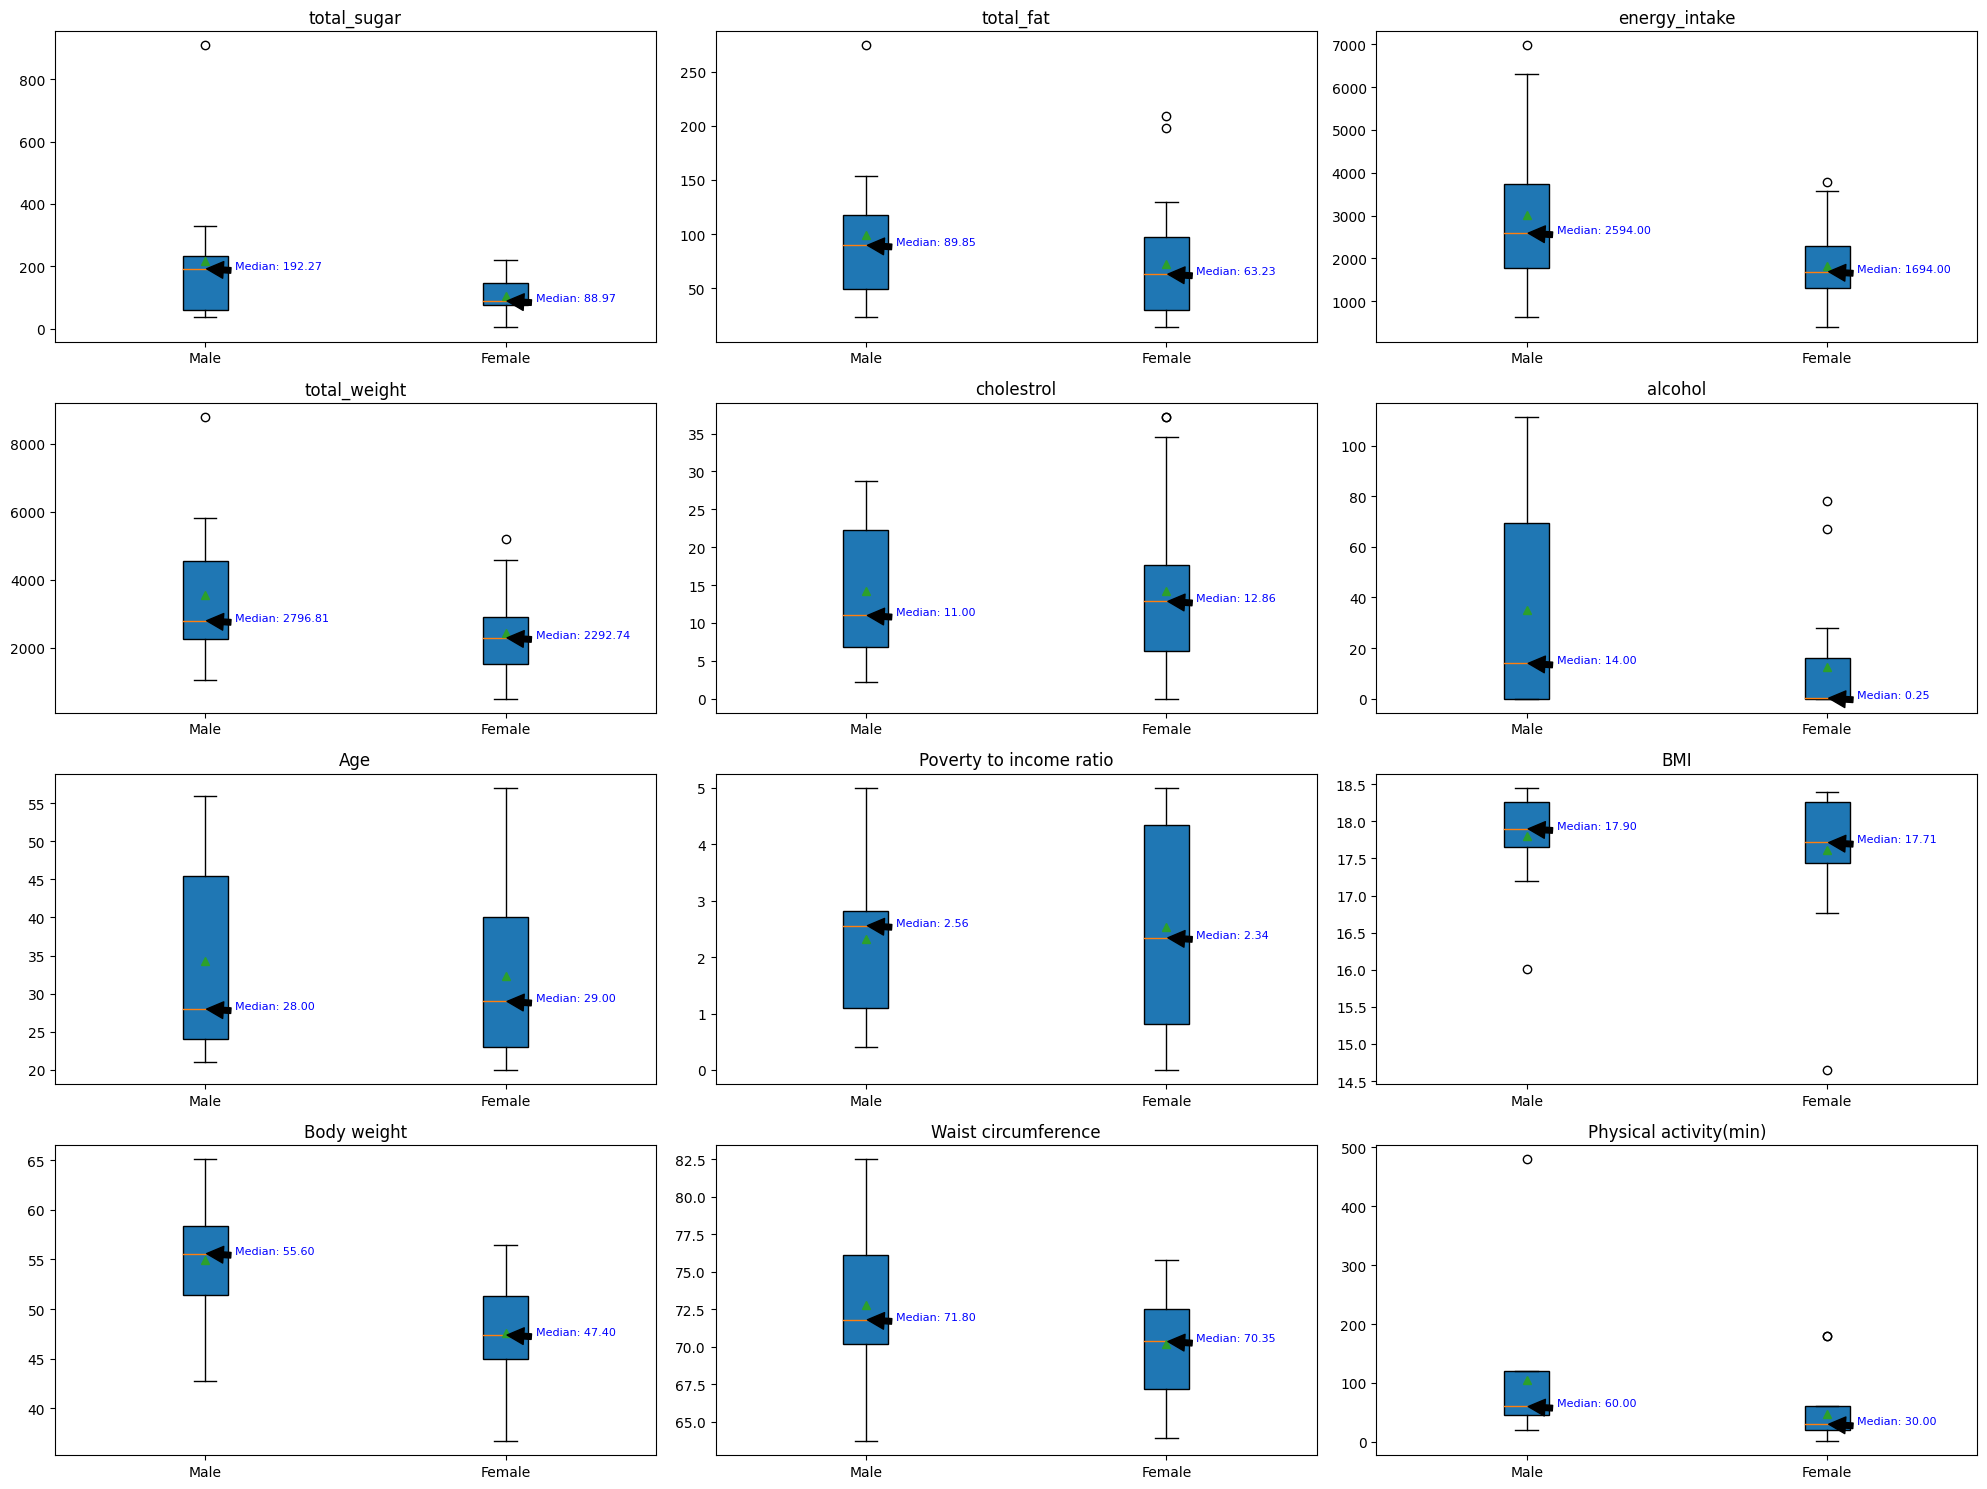

In [40]:
boxplot(underwt)

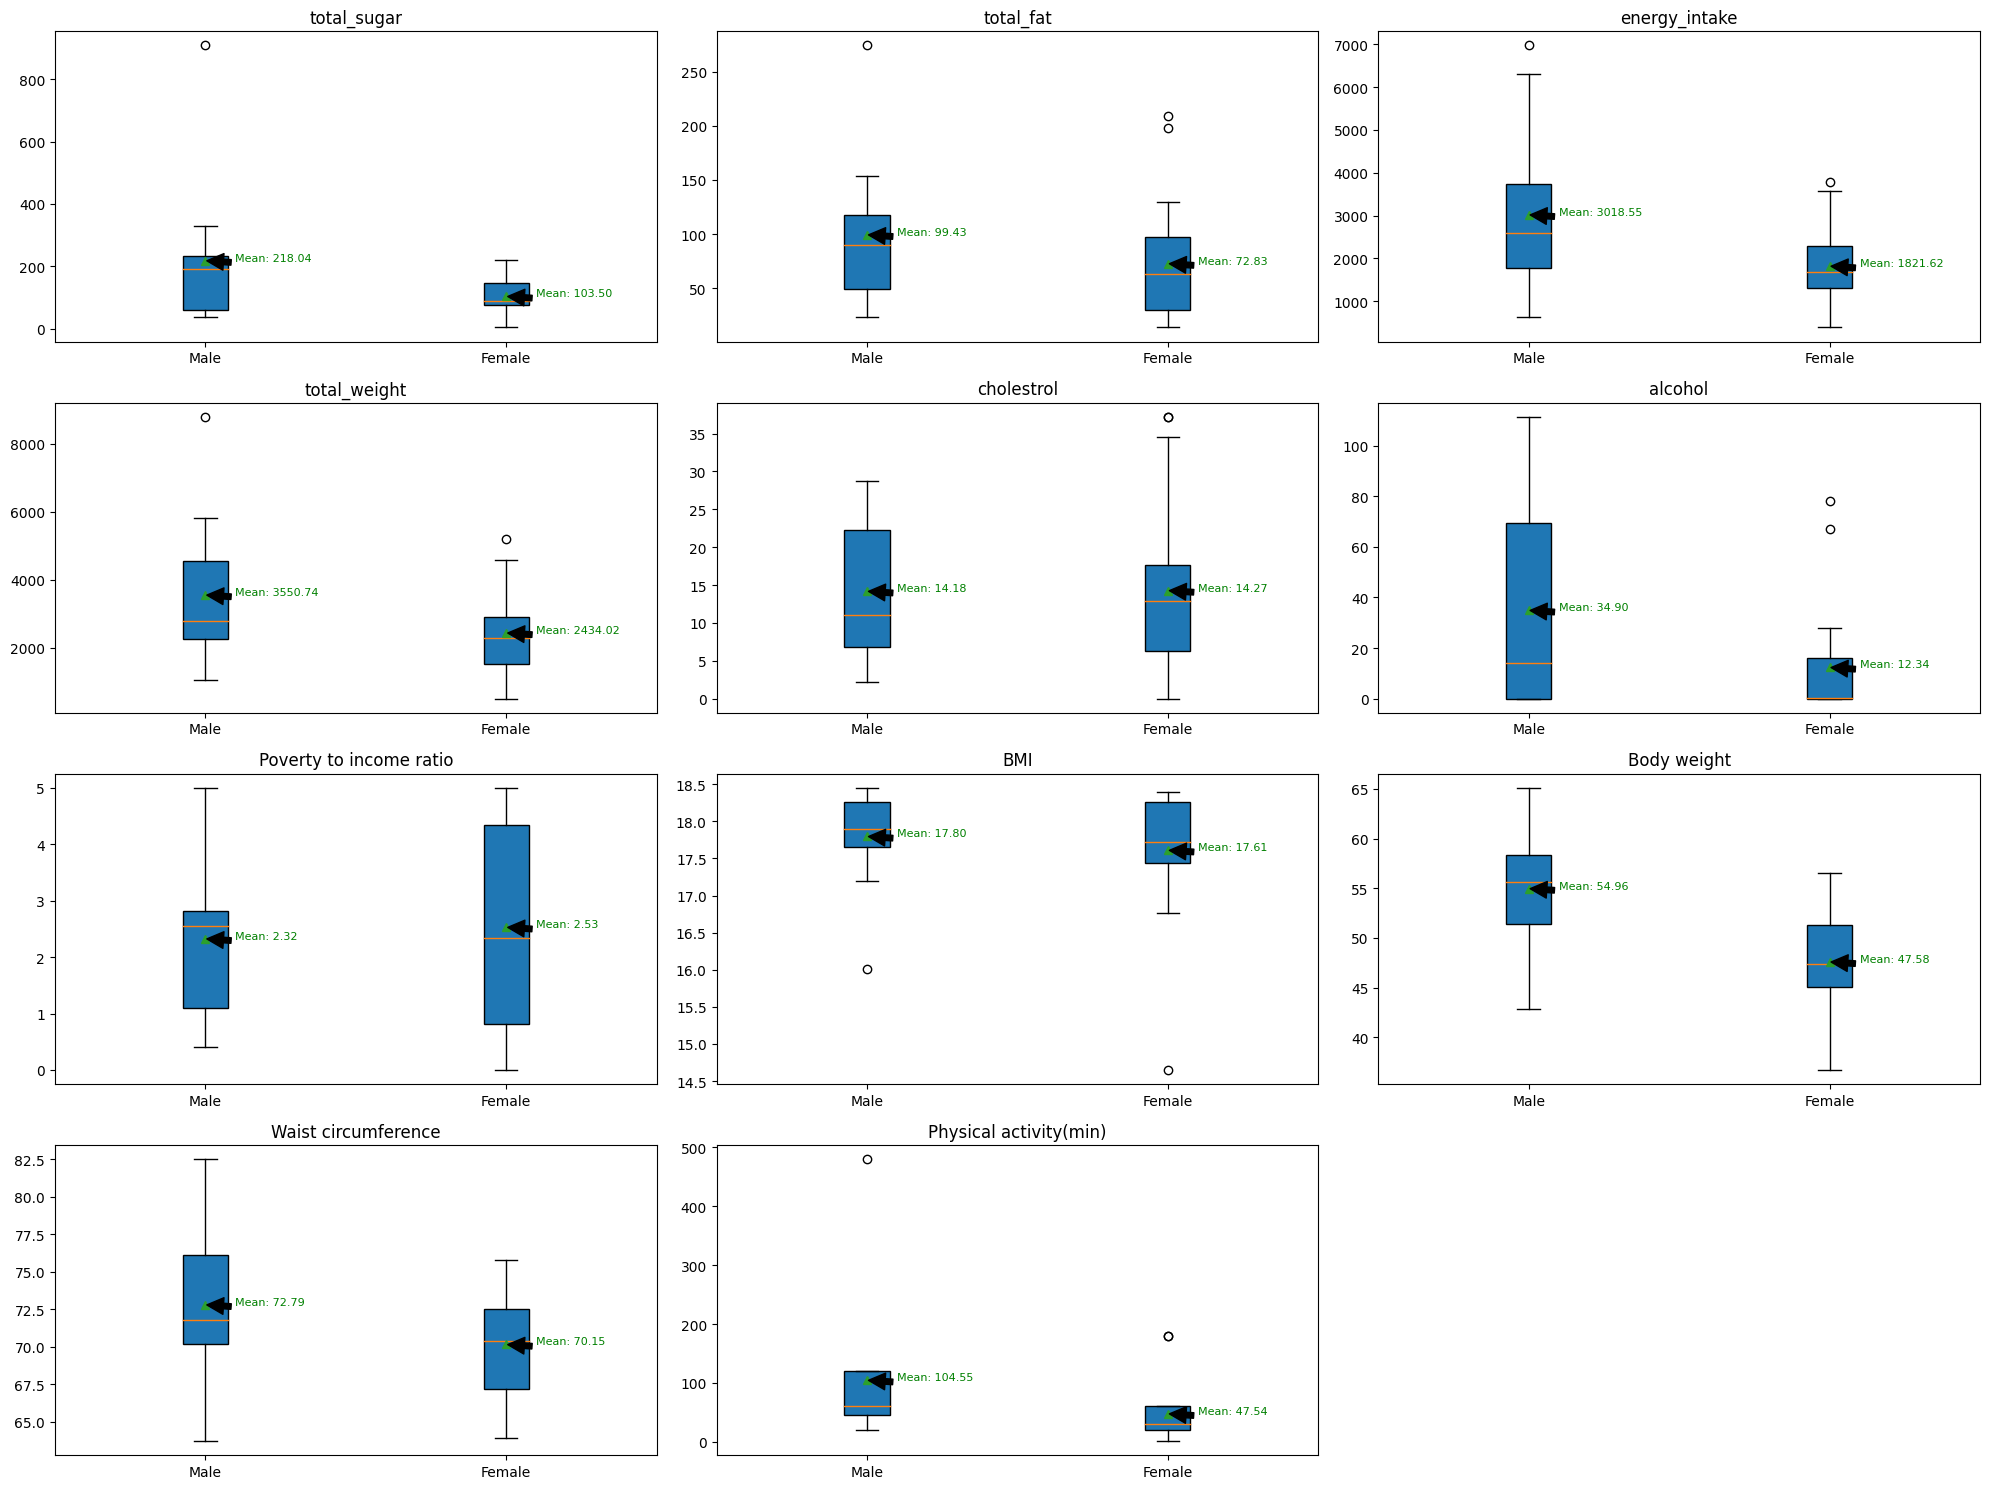

In [191]:
boxplot(underwt)

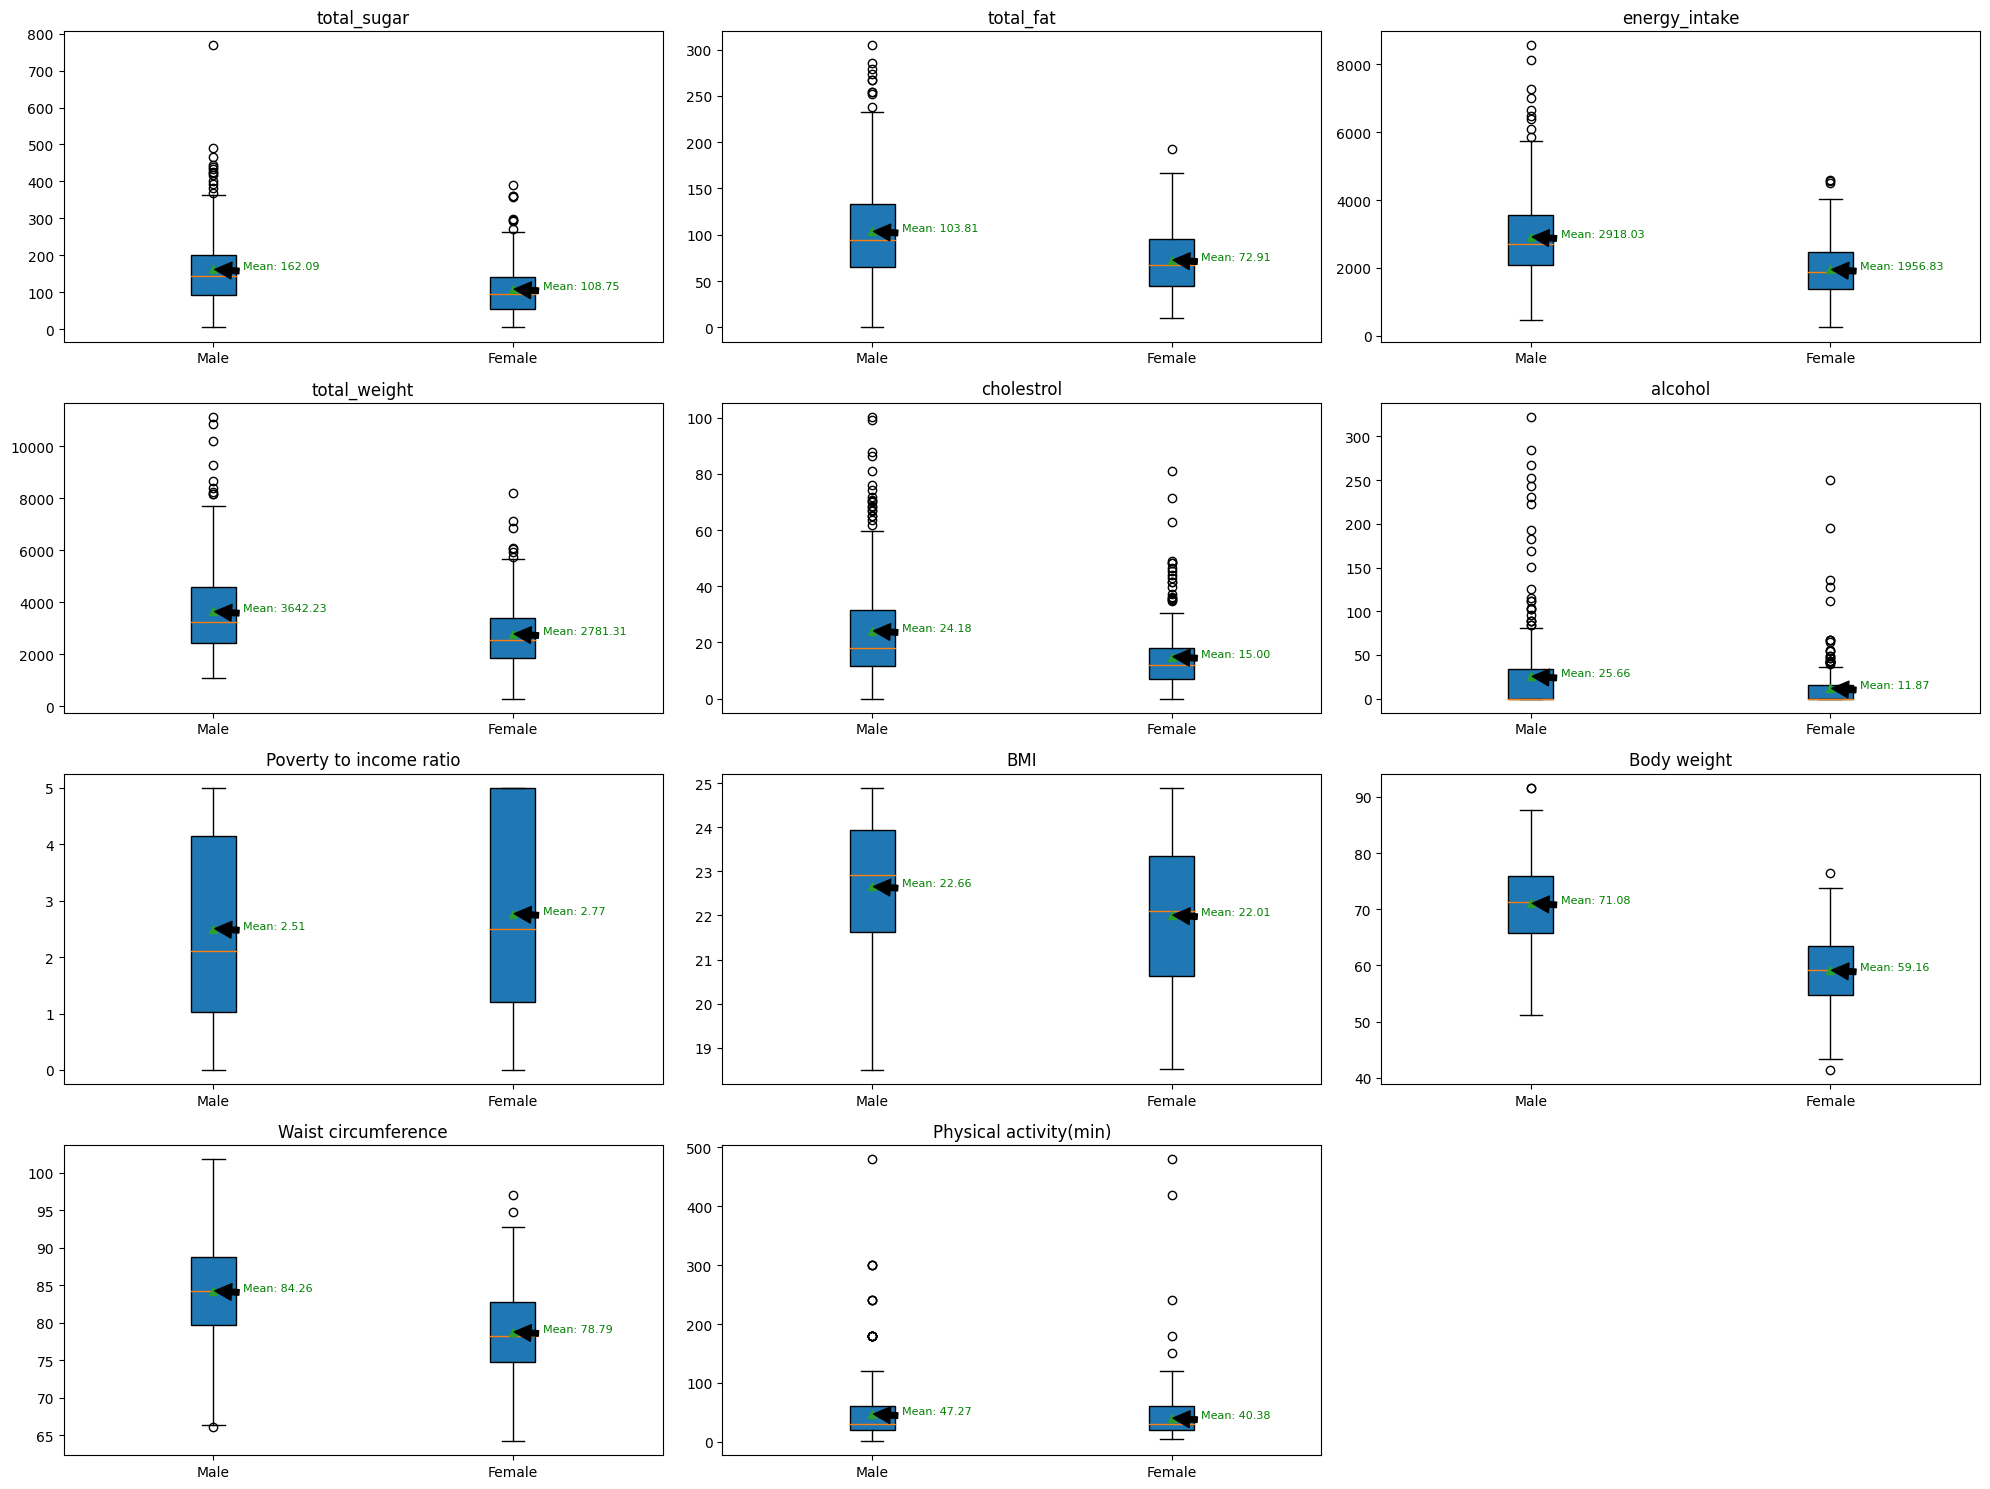

In [192]:
boxplot(nrmlwt)

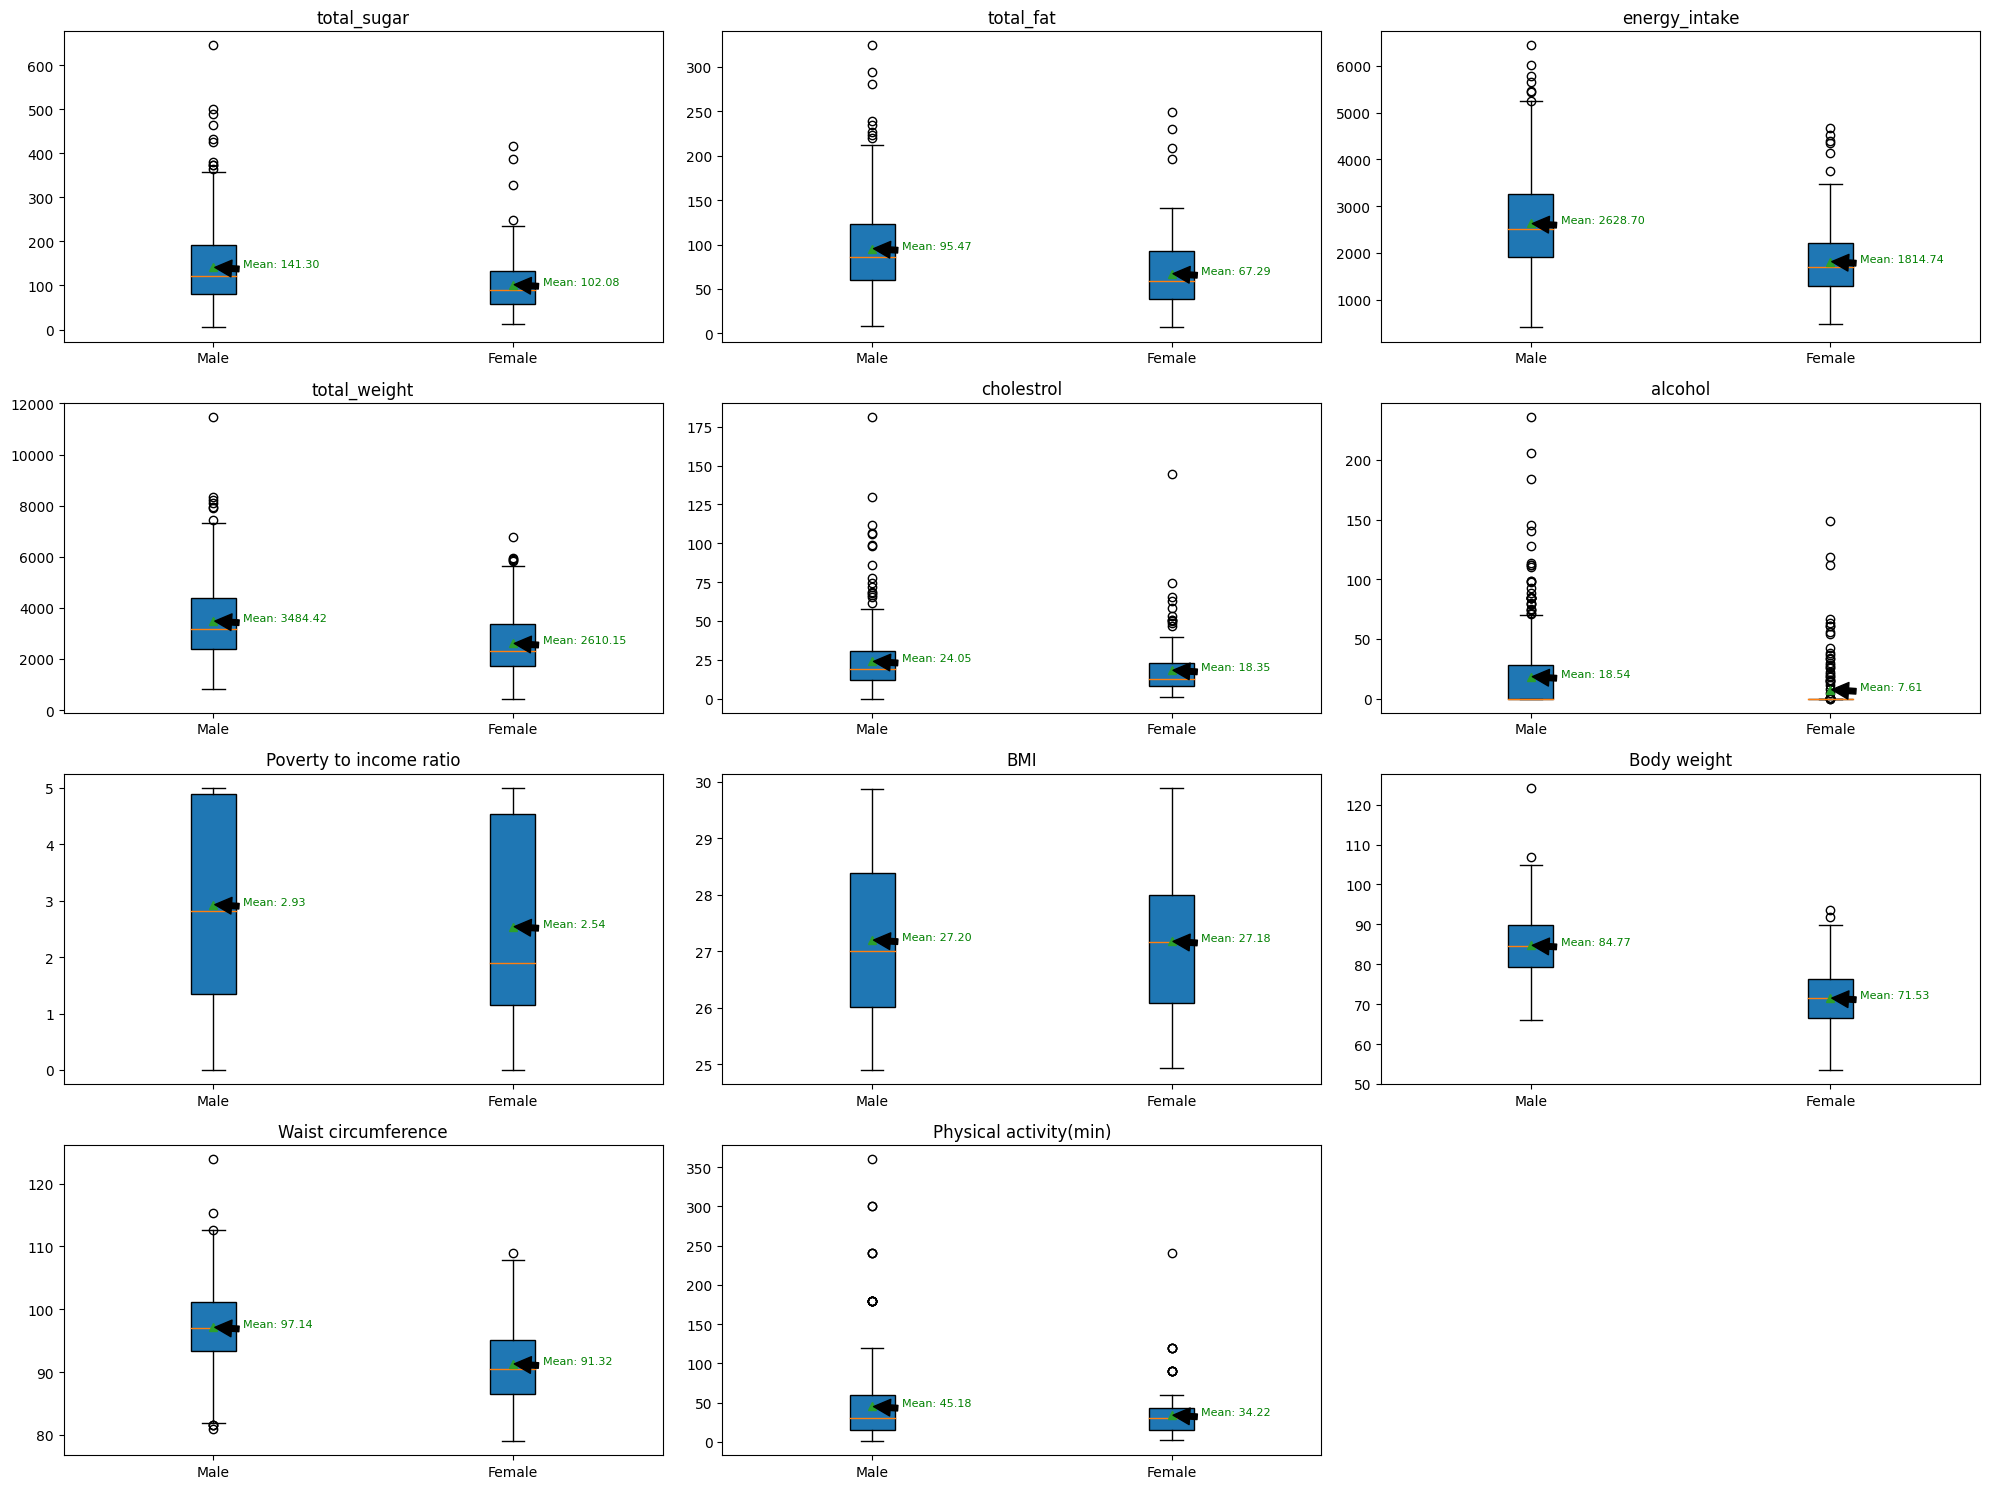

In [193]:
boxplot(overwt)

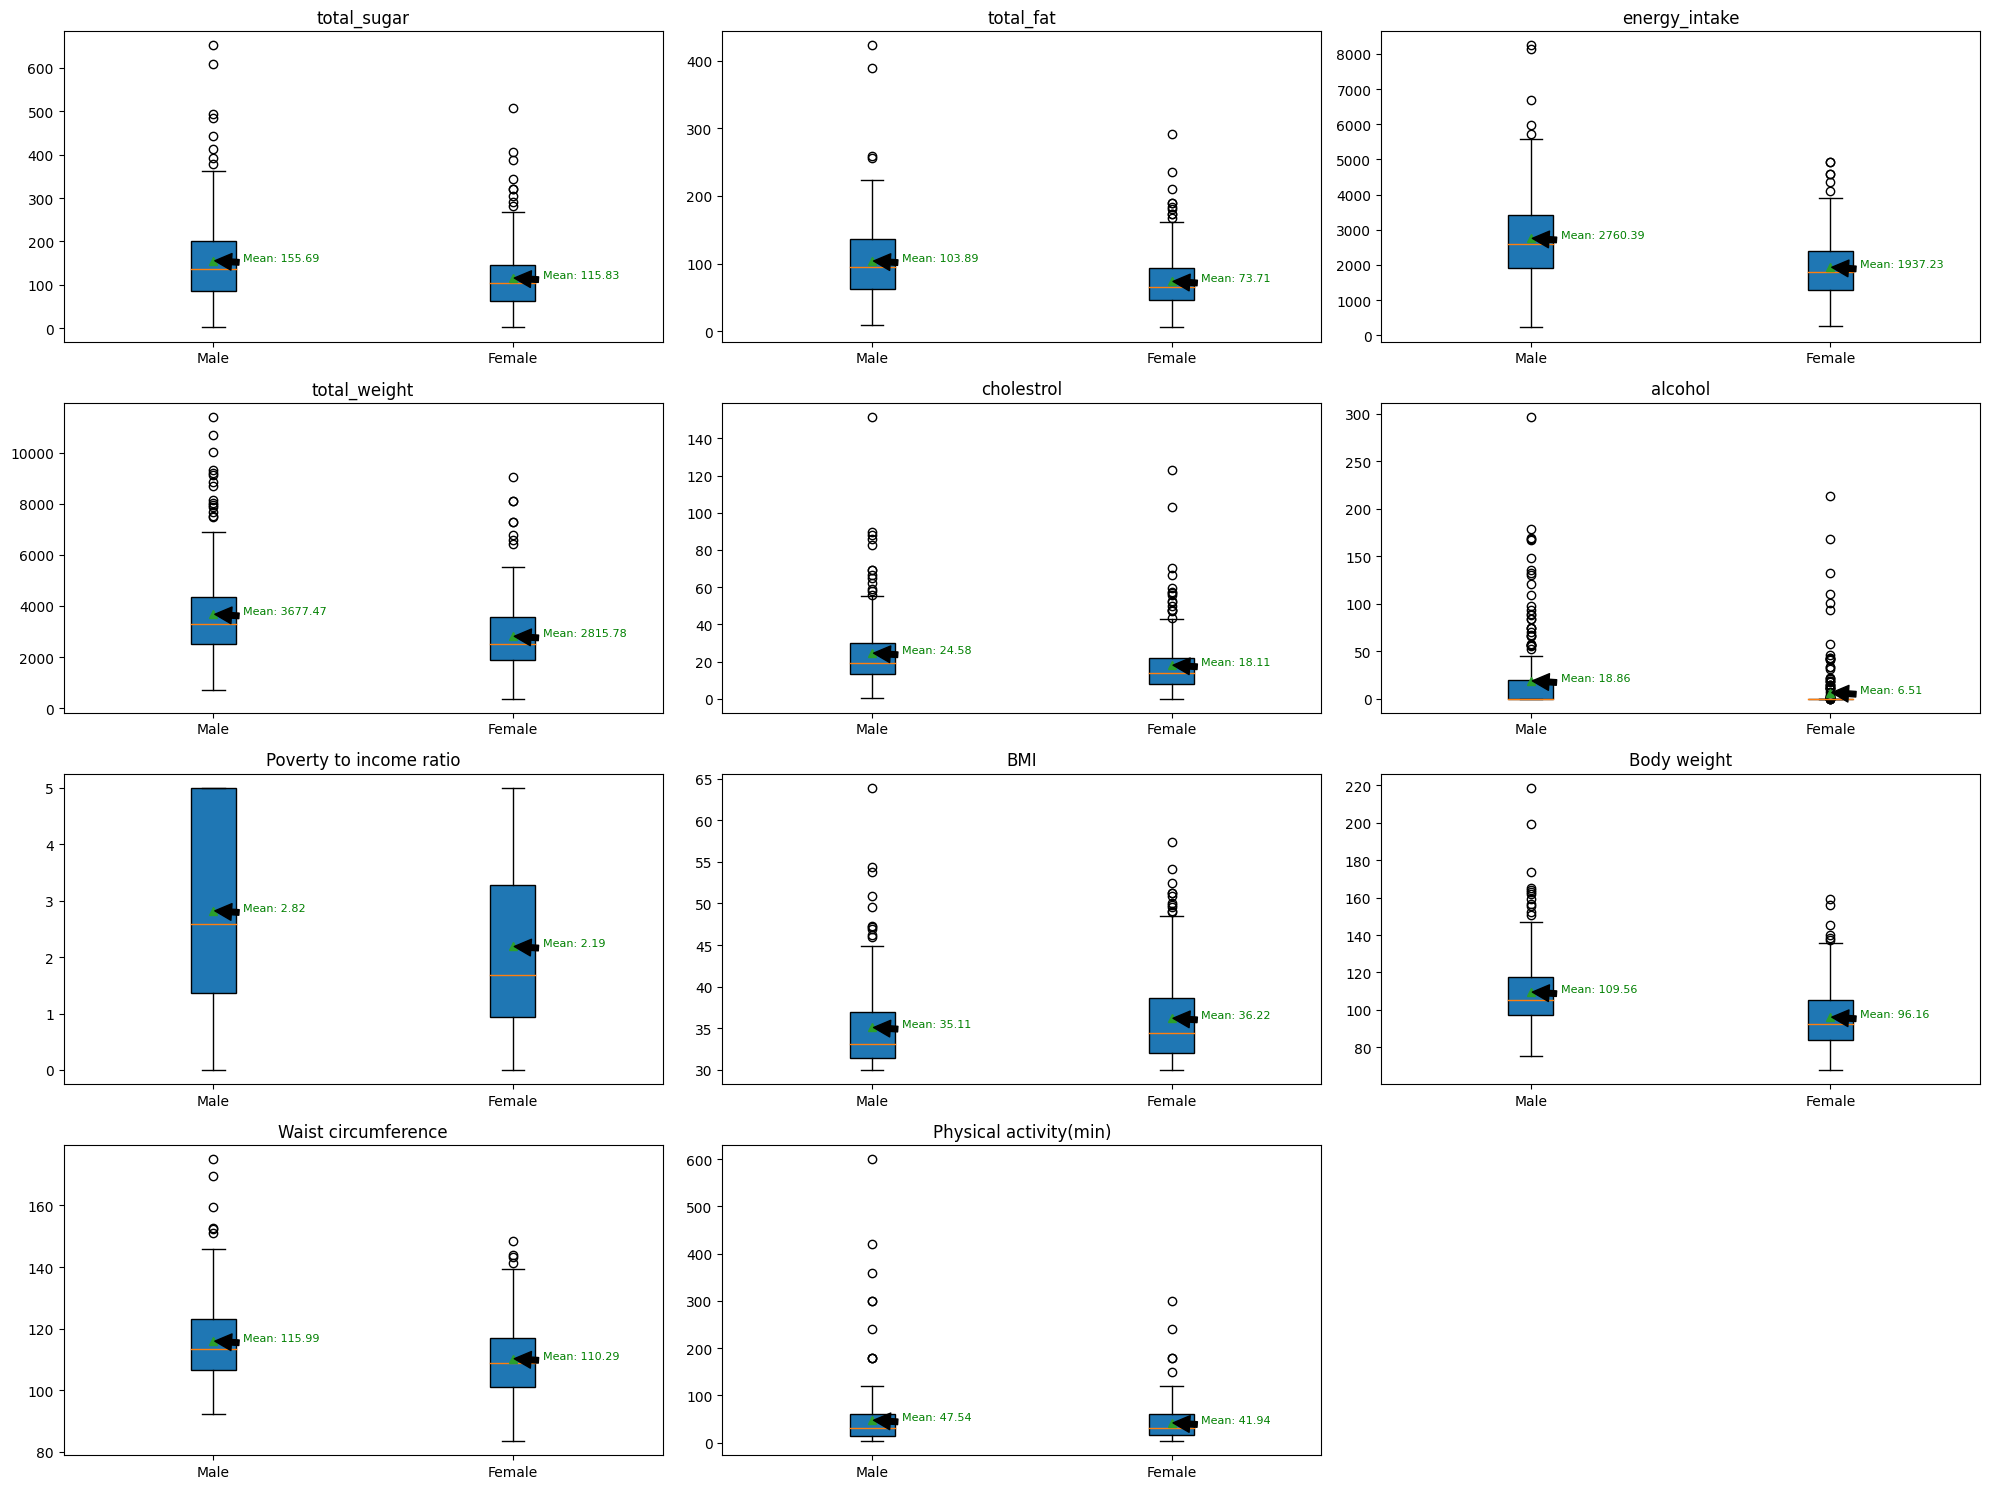

In [194]:
boxplot(obese)

In [195]:
# obeseness = []
# for col in data['BMI']:
#     if col<18.5:
#         obeseness.append(0)
#     elif col >= 18.5 and col < 24.9:
#         obeseness.append(1)
#     elif col >= 24.9 and col < 29.9:
#         obeseness.append(2)
#     else:
#         obeseness.append(3)

# data['Obeseness'] = obeseness

### Feature Engineering

In [196]:
data

total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
0          107.66      70.08         2176.0       2098.06   19.714286   
1           84.92      53.74         1042.0       1040.79   22.000000   
2           45.65      22.97          839.0       1401.61    5.900000   
3          163.69     137.59         4190.0       7489.00   51.615385   
4           54.95      28.36         1425.0       1713.75    4.588235   
...           ...        ...            ...           ...         ...   
1495        83.03     149.10         2913.0       3341.17   30.578947   
1496        22.32      17.84          782.0       4429.32   13.625000   
1497       391.39     174.30         4430.0       5132.86   18.739130   
1498       301.05     137.81         3994.0       3109.52   12.652174   
1499       176.14     177.15         4791.0       6262.06   17.076923   

           alcohol  Gender  Race  Poverty to income ratio   Age  Body weight  \
0     7.556647e-78     2.0   1.0                     0.21  37.0         45.1   
1     5.937366e-78     2.0   4.0                     0.33  57.0         90.3   
2     1.410000e+01     2.0   3.0                     5.00  51.0         52.3   
3     1.674000e+02     1.0   3.0                     2.40  25.0        108.3   
4     1.530000e+01     2.0   3.0                     1.61  25.0         57.4   
...            ...     ...   ...                      ...   ...          ...   
1495  1.025545e-77     2.0   3.0                     1.89  20.0         54.9   
1496  4.318084e-78     1.0   3.0                     4.76  21.0         91.7   
1497  1.241449e-77     1.0   2.0                     0.31  20.0        105.1   
1498  1.241449e-77     1.0   3.0                     5.00  57.0        118.9   
1499  7.270000e+01     1.0   3.0                     4.83  56.0         75.2   

        BMI  Waist circumference  Physical activity(min)   BMI_Category  
0     19.34                 77.8                    15.0  Normal weight  
1     32.07                103.0                    45.0          Obese  
2     20.61                 70.0                    15.0  Normal weight  
3     31.17                107.4                    30.0          Obese  
4     22.09                 77.0                    10.0  Normal weight  
...     ...                  ...                     ...            ...  
1495  21.45                 73.2                    15.0  Normal weight  
1496  27.35                100.5                    30.0     Overweight  
1497  31.04                 97.6                    15.0          Obese  
1498  32.90                114.7                    30.0          Obese  
1499  23.71                 88.5                    20.0  Normal weight  

[1500 rows x 15 columns]

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['BMI_Category'] = le.fit_transform(data['BMI_Category'])

In [217]:
X = data.drop(['BMI','BMI_Category'], axis=1)
y = data['BMI_Category']

In [218]:
X

total_sugar  total_fat  energy_intake  total_weight  cholestrol  \
0          107.66      70.08         2176.0       2098.06   19.714286   
1           84.92      53.74         1042.0       1040.79   22.000000   
2           45.65      22.97          839.0       1401.61    5.900000   
3          163.69     137.59         4190.0       7489.00   51.615385   
4           54.95      28.36         1425.0       1713.75    4.588235   
...           ...        ...            ...           ...         ...   
1495        83.03     149.10         2913.0       3341.17   30.578947   
1496        22.32      17.84          782.0       4429.32   13.625000   
1497       391.39     174.30         4430.0       5132.86   18.739130   
1498       301.05     137.81         3994.0       3109.52   12.652174   
1499       176.14     177.15         4791.0       6262.06   17.076923   

           alcohol  Gender  Race  Poverty to income ratio   Age  Body weight  \
0     7.556647e-78     2.0   1.0                     0.21  37.0         45.1   
1     5.937366e-78     2.0   4.0                     0.33  57.0         90.3   
2     1.410000e+01     2.0   3.0                     5.00  51.0         52.3   
3     1.674000e+02     1.0   3.0                     2.40  25.0        108.3   
4     1.530000e+01     2.0   3.0                     1.61  25.0         57.4   
...            ...     ...   ...                      ...   ...          ...   
1495  1.025545e-77     2.0   3.0                     1.89  20.0         54.9   
1496  4.318084e-78     1.0   3.0                     4.76  21.0         91.7   
1497  1.241449e-77     1.0   2.0                     0.31  20.0        105.1   
1498  1.241449e-77     1.0   3.0                     5.00  57.0        118.9   
1499  7.270000e+01     1.0   3.0                     4.83  56.0         75.2   

      Waist circumference  Physical activity(min)  
0                    77.8                    15.0  
1                   103.0                    45.0  
2                    70.0                    15.0  
3                   107.4                    30.0  
4                    77.0                    10.0  
...                   ...                     ...  
1495                 73.2                    15.0  
1496                100.5                    30.0  
1497                 97.6                    15.0  
1498                114.7                    30.0  
1499                 88.5                    20.0  

[1500 rows x 13 columns]

In [219]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1495    0
1496    2
1497    1
1498    1
1499    0
Name: BMI_Category, Length: 1500, dtype: int64

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [221]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature importances:")
print(feature_importances)

Feature importances:
Waist circumference        0.316127
Body weight                0.276647
cholestrol                 0.046833
total_weight               0.046340
total_fat                  0.045109
energy_intake              0.043459
total_sugar                0.043401
Age                        0.040841
Poverty to income ratio    0.036727
Gender                     0.029938
Physical activity(min)     0.026322
alcohol                    0.024654
Race                       0.023604
dtype: float64


In [222]:
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

In [223]:
y_pred1

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 3, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1,
       2, 2, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1], d

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1, labels=[1, 2, 3,4]))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        90
           2       0.70      0.60      0.64        97
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         0

   micro avg       0.73      0.70      0.71       193
   macro avg       0.36      0.36      0.36       193
weighted avg       0.70      0.70      0.70       193



C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and be

In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.7633333333333333

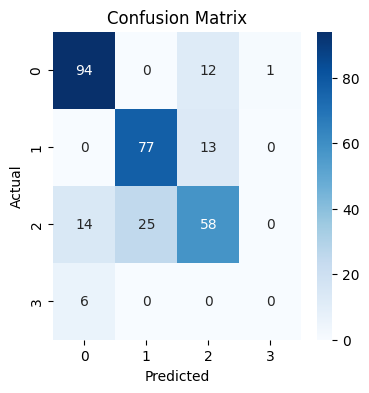

In [230]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()